In [4]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import plotly.express as px
import plotly.io as pio
import seaborn as sns

from pathlib import Path
import pandas as pd
import numpy as np
import itertools

import statsmodels.api as sm
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.renderers.default = "iframe"

In [11]:
def fix_up_df(df: pd.DataFrame):
    df["z"] = df.z.fillna(0)
    df["za"] = df.za.fillna(0)
    df["information_remaining"] = df.n_craters_in_study_region / df.n_craters_added_in_study_region
    df["removals"] = df.n_craters_added_in_study_region - df.n_craters_in_study_region
    return df

In [9]:
def plot_n_ad_and_ir_for_simulation(simulation_id: int, stats_df: pd.DataFrame):
    df = stats_df[stats_df.simulation_id == simulation_id]
    df.head()
    
    print(df[["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage"]].iloc[0])
    
    fig = plt.figure(figsize=(18, 4))
    ax1 = fig.add_subplot(121)
    
    plt1 = ax1.plot(df.n_craters_added_in_study_region, df.information_remaining, color='red', label="Information Remaining")
    ax1.set_ylabel("Information Remaining")
    ax1.set_xlabel("N Craters Added")
    
    ax2 = ax1.twinx()
    plt2 = ax2.plot(df.n_craters_added_in_study_region, df.areal_density, color="blue", label="Areal Density")
    ax2.set_ylabel("Areal Density")
    
    lns = plt1 + plt2
    ax1.legend(lns, [l.get_label() for l in lns], loc=4)
    
    ax1.set_title(f"Simulation {simulation_id}")


    ax1 = fig.add_subplot(122)
    
    plt1 = ax1.plot(df.n_craters_added_in_study_region, df.information_remaining, color='red', label="Information Remaining")
    ax1.set_ylabel("Information Remaining")
    ax1.set_xlabel("N Craters Added")
    
    ax2 = ax1.twinx()
    plt2 = ax2.plot(df.n_craters_added_in_study_region, df.n_craters_in_study_region, color="blue", label="N Craters Remaining")
    ax2.set_ylabel("Areal Density")
    
    lns = plt1 + plt2
    ax1.legend(lns, [l.get_label() for l in lns], loc=4)
    
    ax1.set_title(f"Simulation {simulation_id}")
    plt.show()

In [2]:
# base_path = "/data/saturation/random_runs_20230812/"
base_path = "/data/saturation/ir_random_1/"

ivs = [
    "slope",
    "effective_radius_multiplier",
    "r_stat_multiplier",
    "min_rim_percentage",
    "z",
    "za",
    "areal_density",
    "areal_density_overlap_2",
    "areal_density_overlap_3",
    "center_to_center_nearest_neighbor_distance_mean",
    "center_to_center_nearest_neighbor_distance_stdev",
    "center_to_center_nearest_neighbor_distance_min",
    "center_to_center_nearest_neighbor_distance_max",
    "n_craters_in_study_region",
    "removals",
    "radius_mean",
    "radius_stdev"
]

non_constant_ivs = [
    "z",
    "za",
    "areal_density",
    "areal_density_overlap_2",
    "areal_density_overlap_3",
    "center_to_center_nearest_neighbor_distance_mean",
    "center_to_center_nearest_neighbor_distance_stdev",
    "center_to_center_nearest_neighbor_distance_min",
    "center_to_center_nearest_neighbor_distance_max",
    "n_craters_in_study_region",
    "removals",
    "radius_mean",
    "radius_stdev"
]

iv_labels = {
    "slope": "$b$",
    "effective_radius_multiplier": "$E_{mult}$",
    "r_stat_multiplier": "$E_{ratio}$",
    "min_rim_percentage": "$M_r$",
    "n_craters_in_study_region": "$N_S$",
    "areal_density": "Median $A_d$",
    "information_remaining": "Information Remaining",
}

In [12]:
stats_df = pd.read_parquet(f"{base_path}/train_10.parquet").sort_values("crater_id")
stats_df = fix_up_df(stats_df)

test_df = pd.read_parquet(f"{base_path}/test_10.parquet").sort_values("crater_id")
test_df = fix_up_df(test_df)

simulation_ids = stats_df.simulation_id.unique()

### Visualizing Information Remaining for a few simulations

It appears that around IR in (0.4, 0.6), saturation is reached according to AD and N.

n = number of craters observable on the surface at present

N = number of craters ever to impact surface

IR = n / N

slope                          1.169860
effective_radius_multiplier    1.452514
r_stat_multiplier              3.942211
min_rim_percentage             0.419309
Name: 12221, dtype: float64


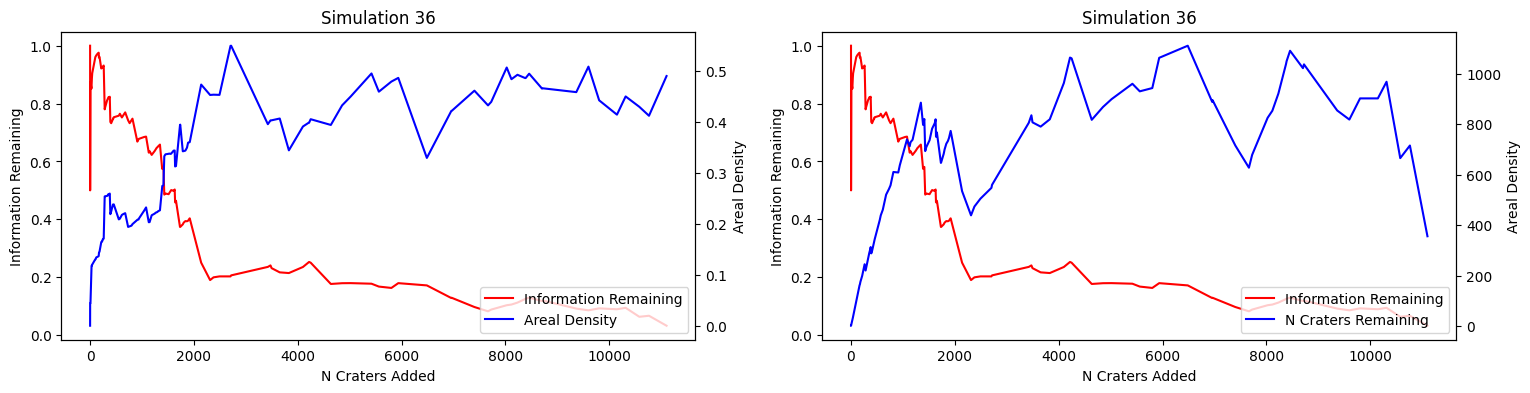

slope                          1.480197
effective_radius_multiplier    1.156501
r_stat_multiplier              7.827298
min_rim_percentage             0.711539
Name: 32889, dtype: float64


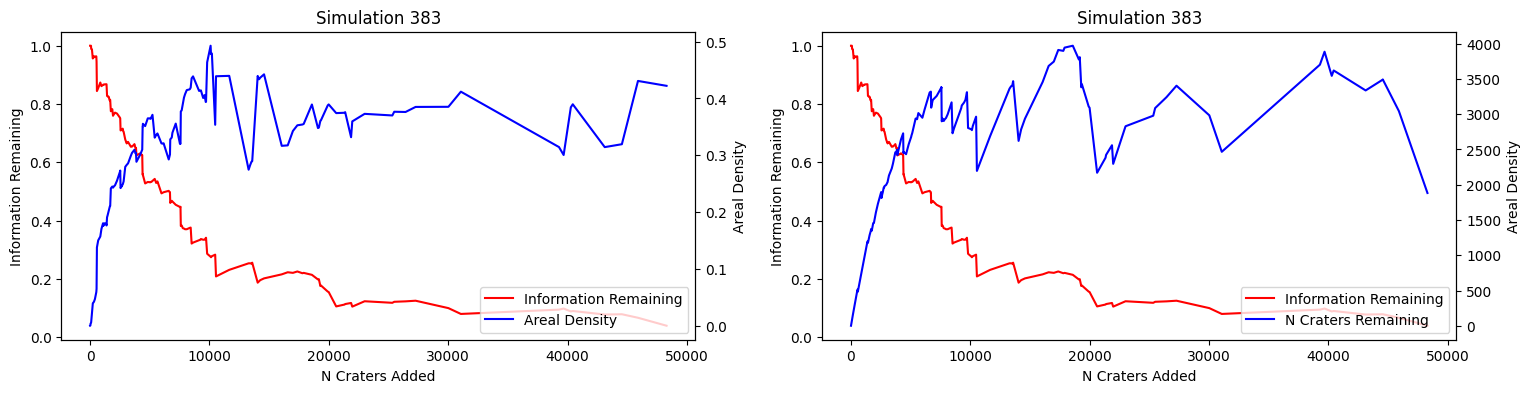

slope                          1.052370
effective_radius_multiplier    1.809678
r_stat_multiplier              5.836556
min_rim_percentage             0.672051
Name: 8964, dtype: float64


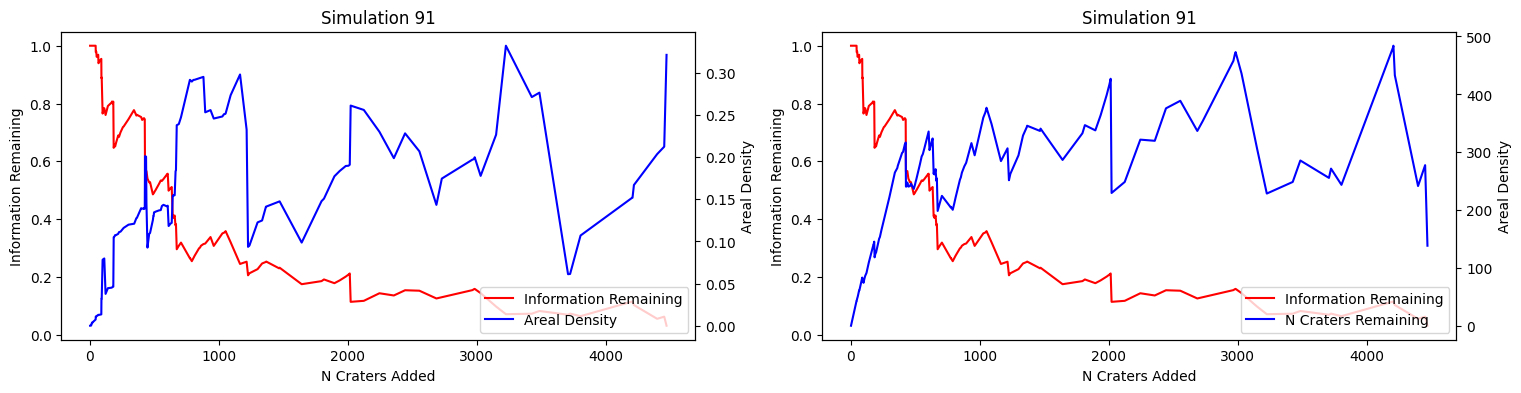

slope                          1.346761
effective_radius_multiplier    1.504498
r_stat_multiplier              6.123299
min_rim_percentage             0.742749
Name: 73434, dtype: float64


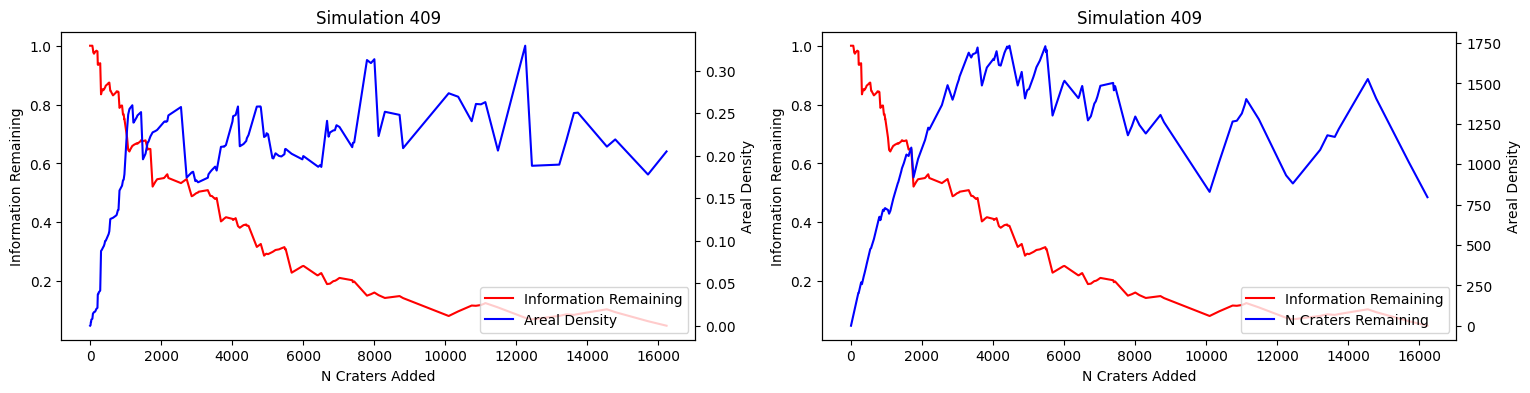

slope                          1.211590
effective_radius_multiplier    1.894099
r_stat_multiplier              7.259005
min_rim_percentage             0.420943
Name: 20445, dtype: float64


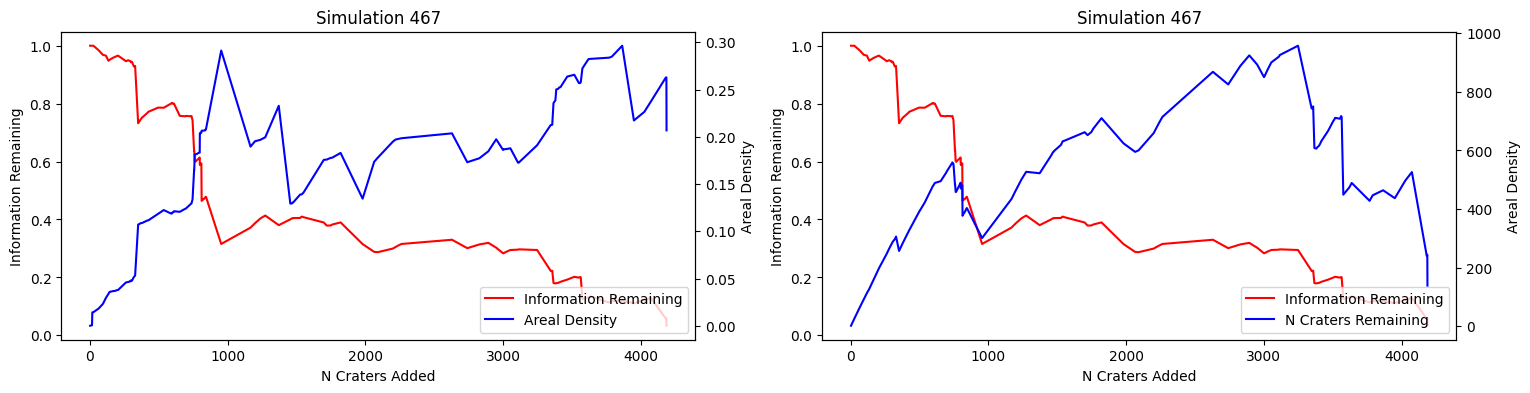

slope                          1.397861
effective_radius_multiplier    1.132747
r_stat_multiplier              3.727857
min_rim_percentage             0.473107
Name: 13456, dtype: float64


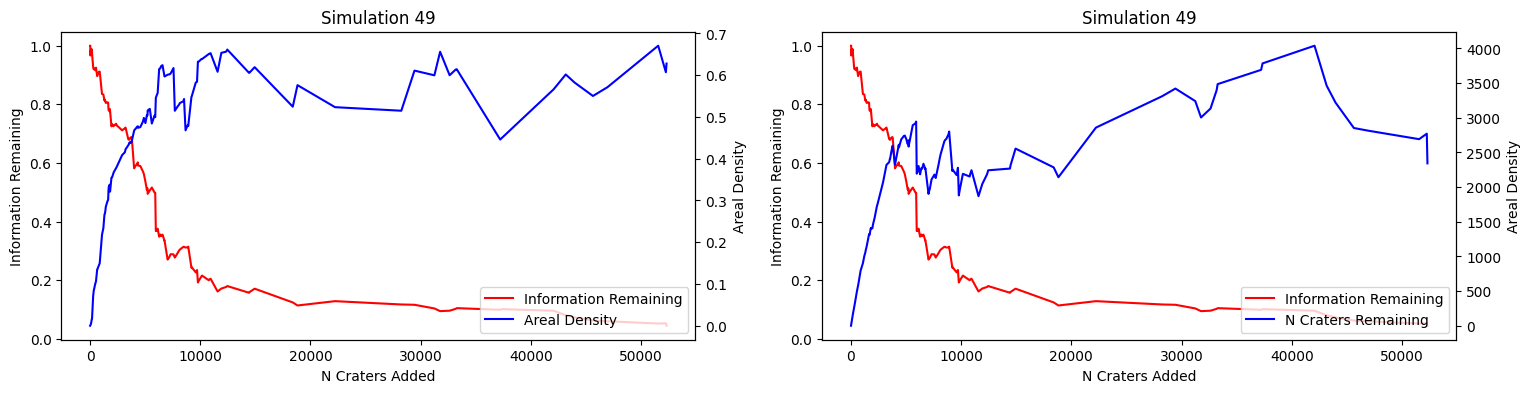

slope                          1.408624
effective_radius_multiplier    1.368671
r_stat_multiplier              5.243868
min_rim_percentage             0.380614
Name: 48705, dtype: float64


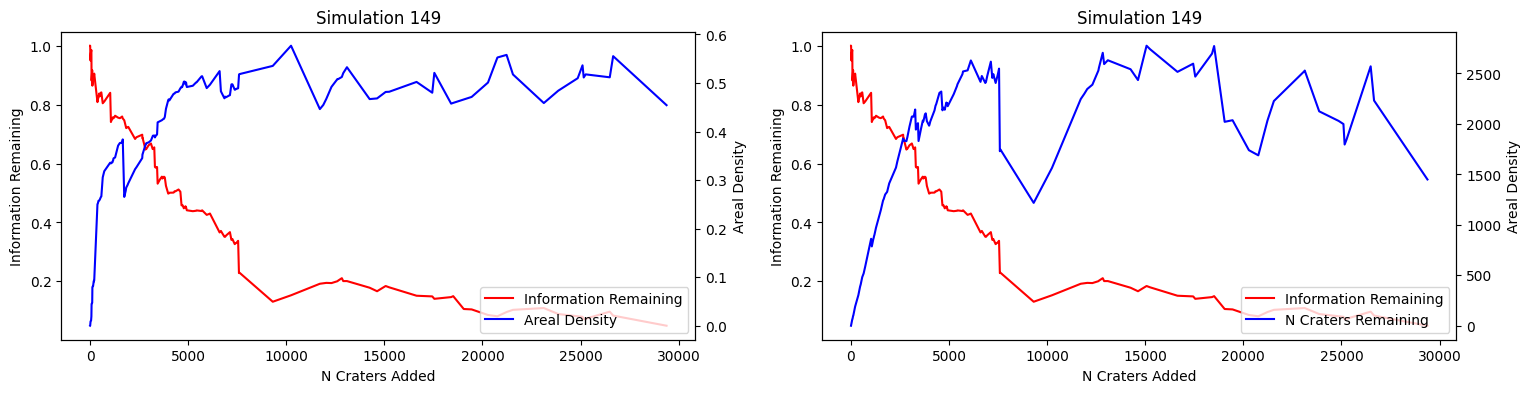

In [13]:
for x in range(8, 15):
    plot_n_ad_and_ir_for_simulation(simulation_ids[x], stats_df)

### Examining Relationships

#### All correlations

<Axes: >

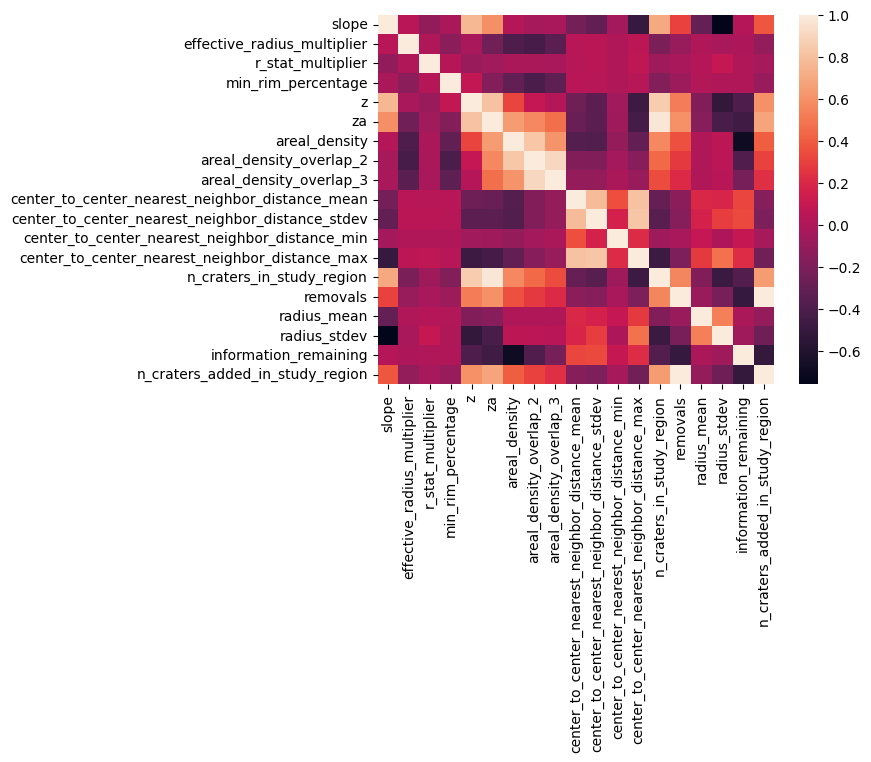

In [14]:
sns.heatmap(stats_df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr())

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

divide by zero encountered in log

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

invalid value encountered in log



<Axes: >

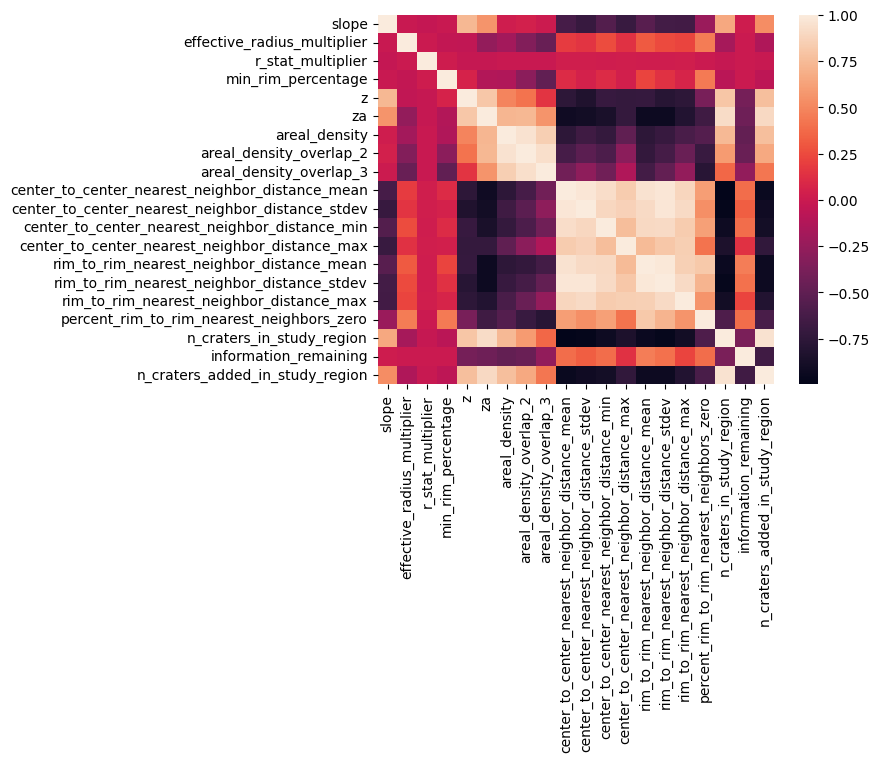

In [202]:
sns.heatmap(np.log(stats_df[ivs + ["information_remaining", "n_craters_added_in_study_region"]]).corr())

In [25]:
stats_df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

slope  \
slope                                             1.000000   
effective_radius_multiplier                      -0.003541   
r_stat_multiplier                                -0.028537   
min_rim_percentage                               -0.011071   
z                                                 0.733432   
za                                                0.553875   
areal_density                                     0.039215   
areal_density_overlap_2                           0.035379   
areal_density_overlap_3                           0.038140   
center_to_center_nearest_neighbor_distance_mean  -0.230005   
center_to_center_nearest_neighbor_distance_stdev -0.308580   
center_to_center_nearest_neighbor_distance_min   -0.047395   
center_to_center_nearest_neighbor_distance_max   -0.465944   
rim_to_rim_nearest_neighbor_distance_mean        -0.155671   
rim_to_rim_nearest_neighbor_distance_stdev       -0.261362   
rim_to_rim_nearest_neighbor_distance_max         -0.356204   
percent_rim_to_rim_nearest_neighbors_zero        -0.203817   
n_craters_in_study_region                         0.681139   
information_remaining                             0.018440   
n_craters_added_in_study_region                   0.389902   

                                                  effective_radius_multiplier  \
slope                                                               -0.003541   
effective_radius_multiplier                                          1.000000   
r_stat_multiplier                                                   -0.000633   
min_rim_percentage                                                  -0.039679   
z                                                                   -0.033805   
za                                                                  -0.326006   
areal_density                                                       -0.434255   
areal_density_overlap_2                                             -0.453389   
areal_density_overlap_3                                             -0.355742   
center_to_center_nearest_neighbor_distance_mean                      0.067500   
center_to_center_nearest_neighbor_distance_stdev                     0.075382   
center_to_center_nearest_neighbor_distance_min                       0.015067   
center_to_center_nearest_neighbor_distance_max                       0.100297   
rim_to_rim_nearest_neighbor_distance_mean                            0.061297   
rim_to_rim_nearest_neighbor_distance_stdev                           0.081599   
rim_to_rim_nearest_neighbor_distance_max                             0.109801   
percent_rim_to_rim_nearest_neighbors_zero                            0.438678   
n_craters_in_study_region                                           -0.260913   
information_remaining                                               -0.004099   
n_craters_added_in_study_region                                     -0.147880   

                                                  r_stat_multiplier  \
slope                                                     -0.028537   
effective_radius_multiplier                               -0.000633   
r_stat_multiplier                                          1.000000   
min_rim_percentage                                         0.014267   
z                                                         -0.026250   
za                                                         0.001767   
areal_density                                             -0.002833   
areal_density_overlap_2                                    0.016159   
areal_density_overlap_3                                    0.031472   
center_to_center_nearest_neighbor_distance_mean            0.010683   
center_to_center_nearest_neighbor_distance_stdev           0.012473   
center_to_center_nearest_neighbor_distance_min             0.001590   
center_to_center_nearest_neighbor_distance_max             0.020692   
rim_to_rim_nearest_neighbor_distance_mean             

#### Plots of IVs vs IR

I am not sure how to interpret these plots.

At the very least, high IR (near 1) occurs across a wide range of other IVs. This is easily explained: crater destruction has not yet become a factor.

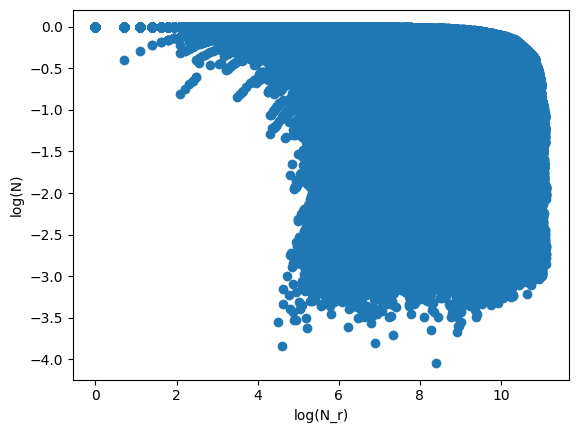

In [7]:
plt.scatter(np.log(stats_df.n_craters_in_study_region), np.log(stats_df.information_remaining))
plt.xlabel("log(N_r)")
plt.ylabel("log(N)")
plt.show()

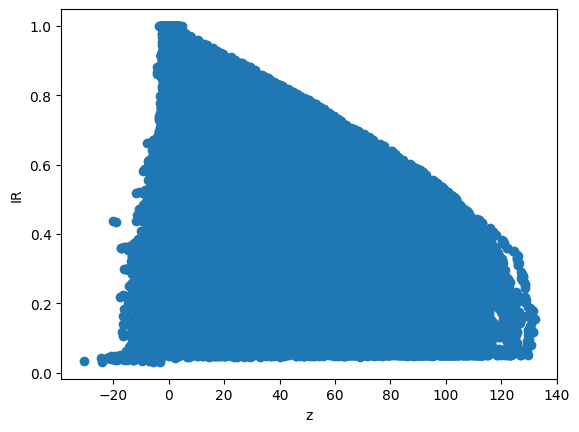

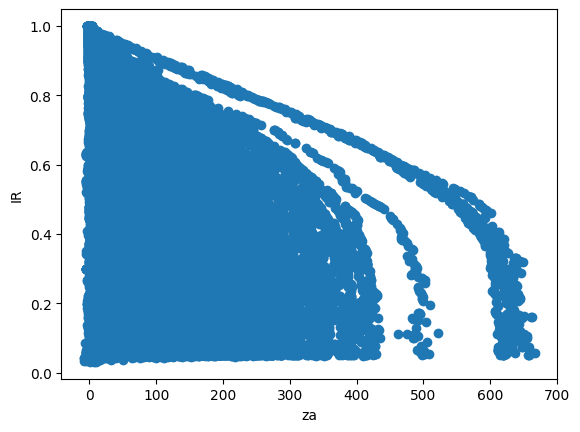

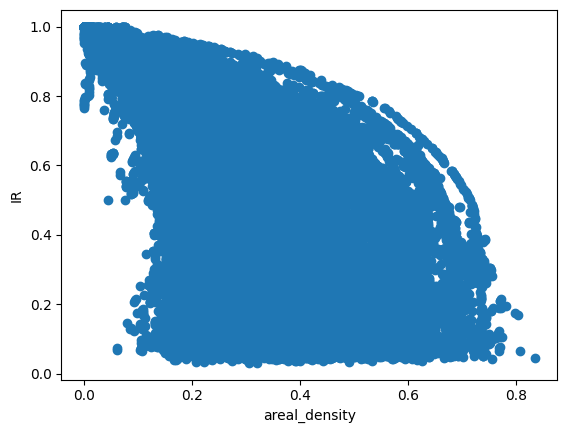

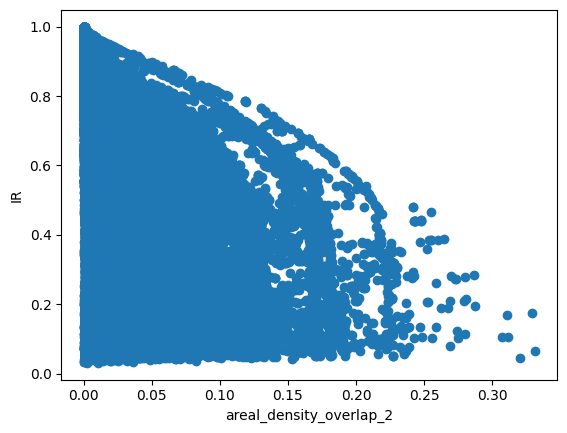

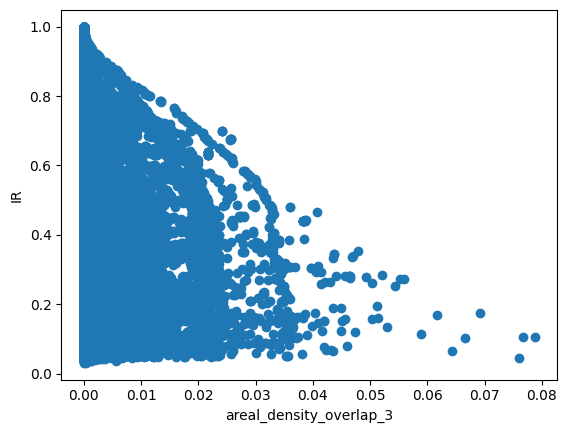

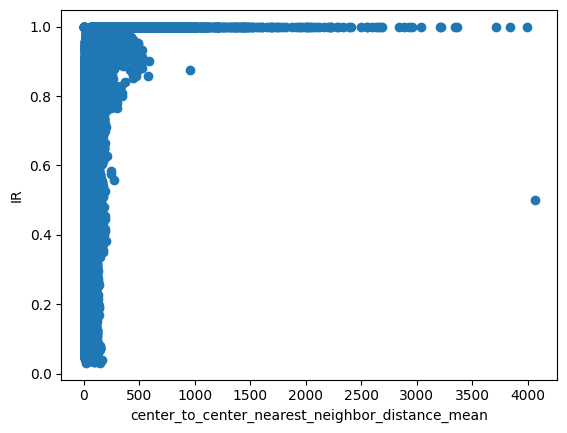

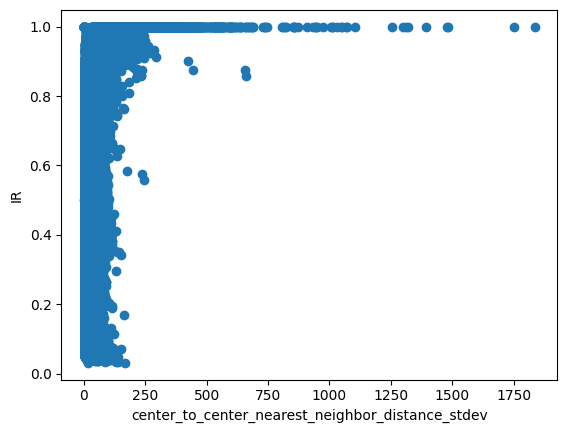

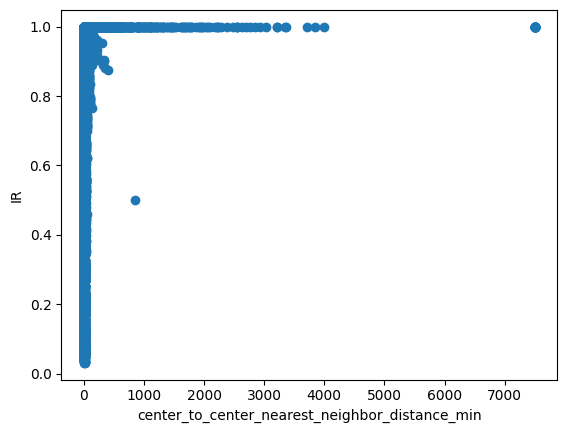

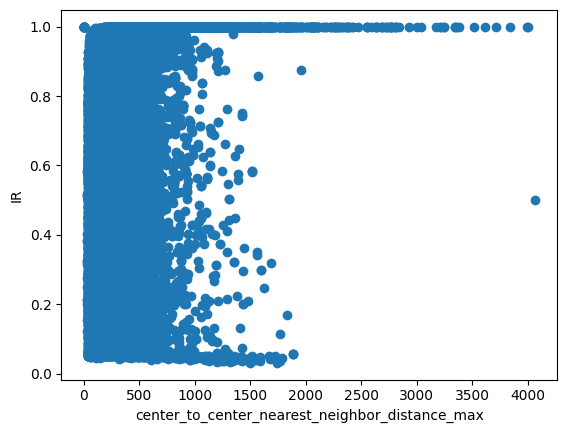

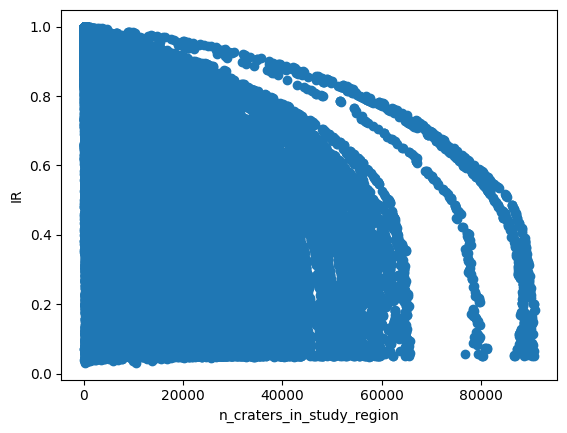

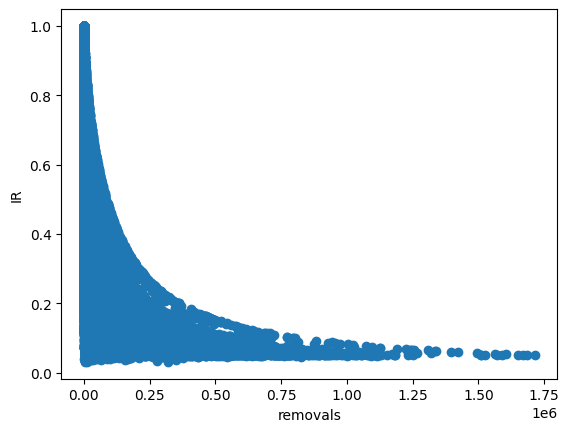

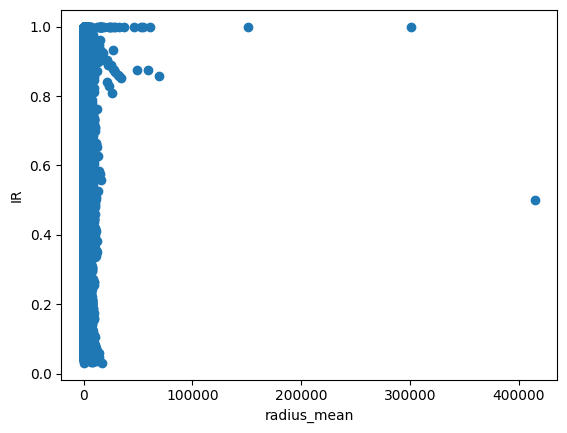

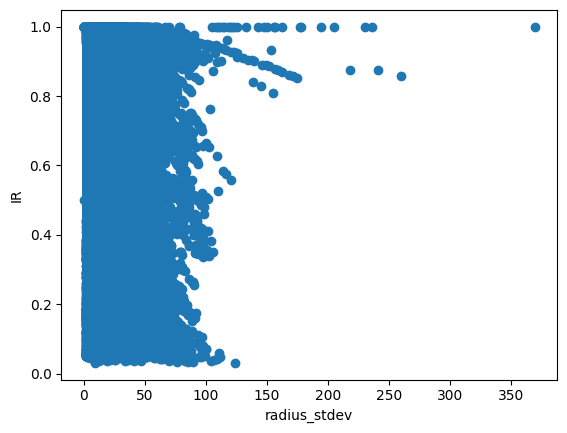

In [16]:
for x in non_constant_ivs:
    plt.scatter(stats_df[x], stats_df.information_remaining)
    plt.xlabel(f"{x}")
    plt.ylabel("IR")
    plt.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



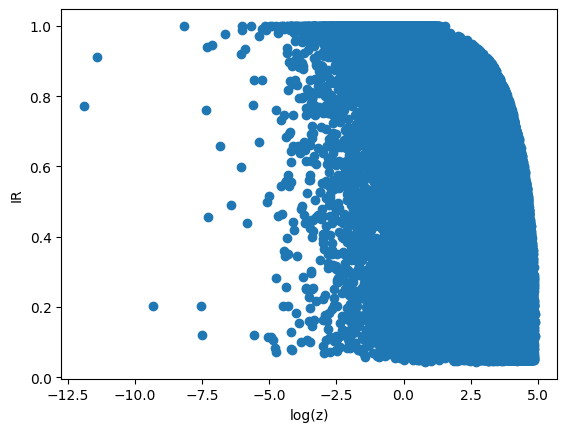

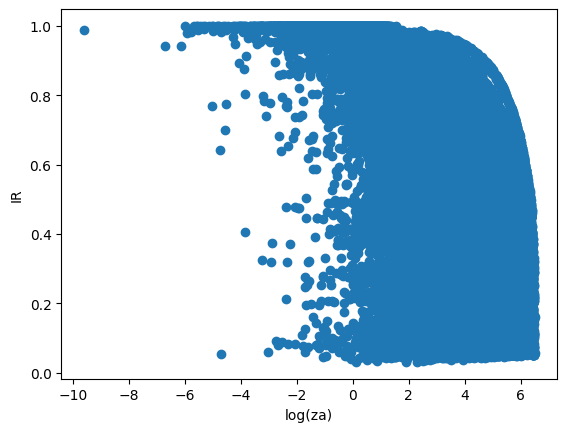

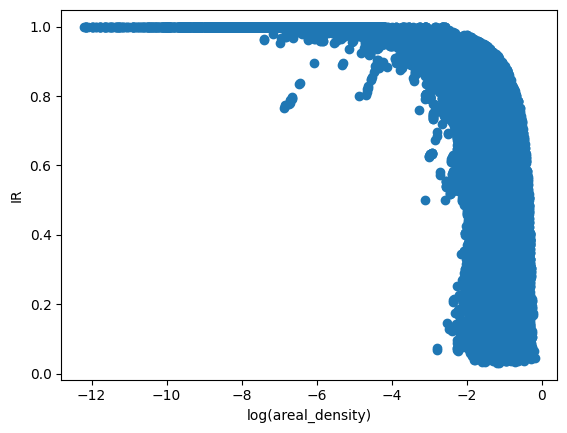

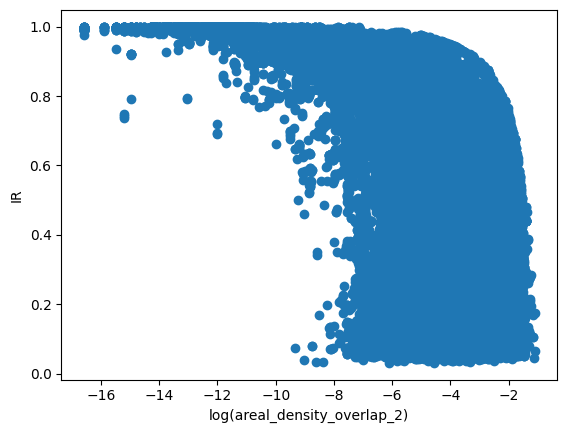

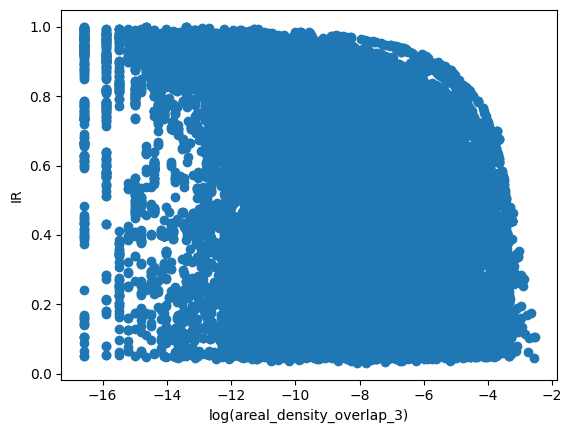

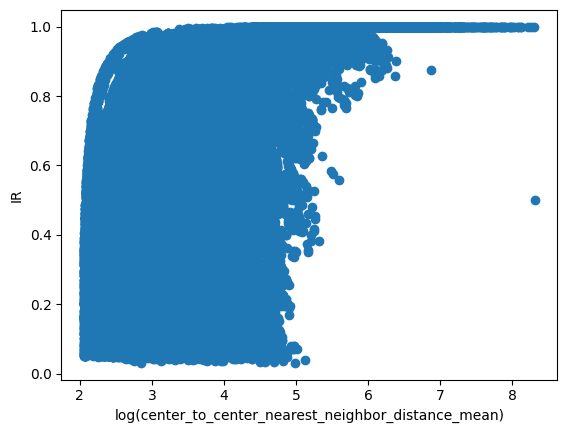

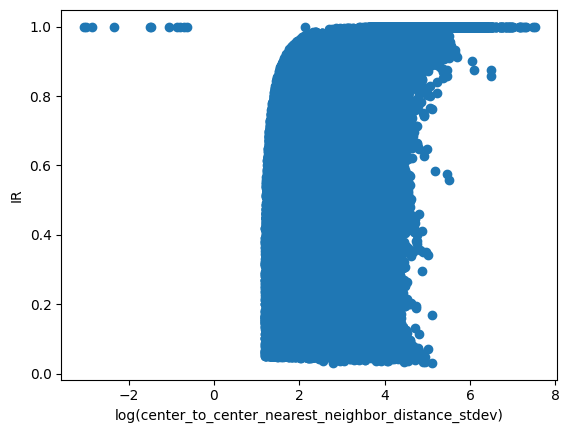

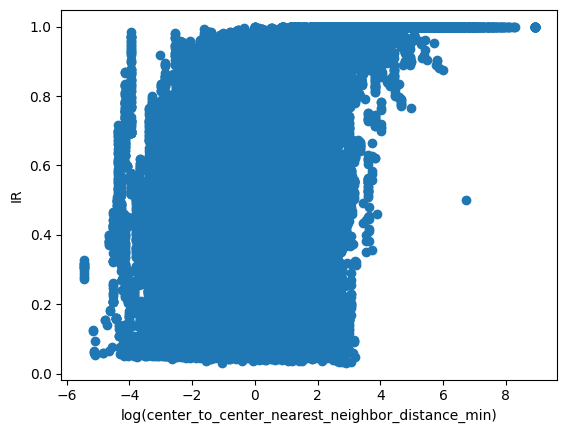

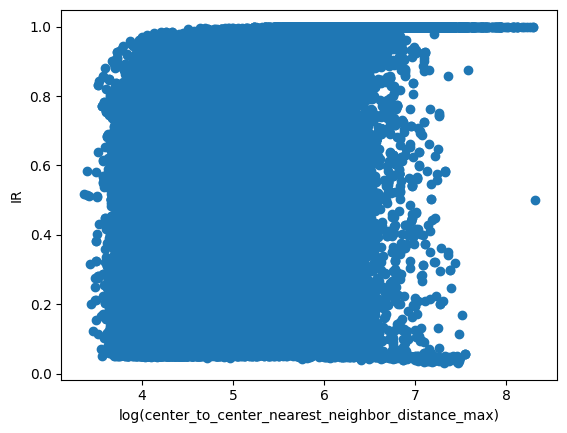

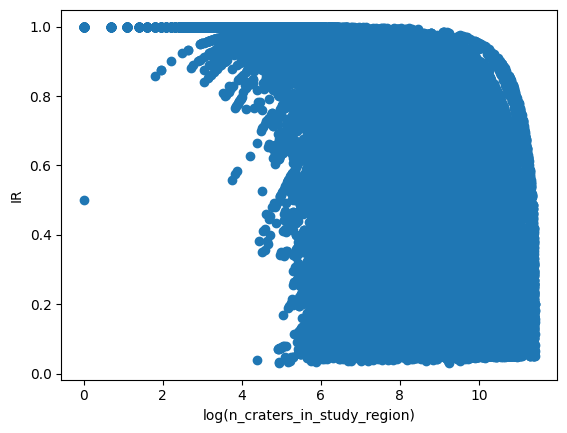

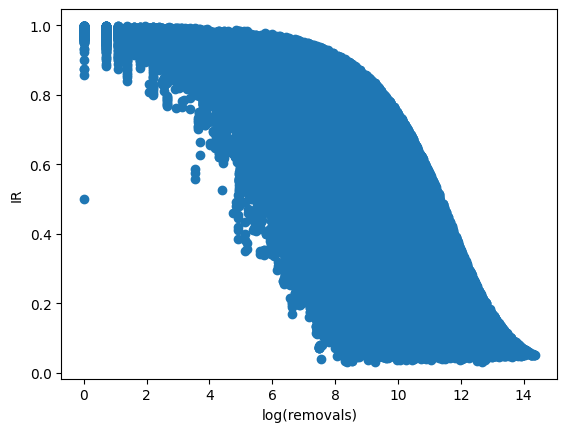

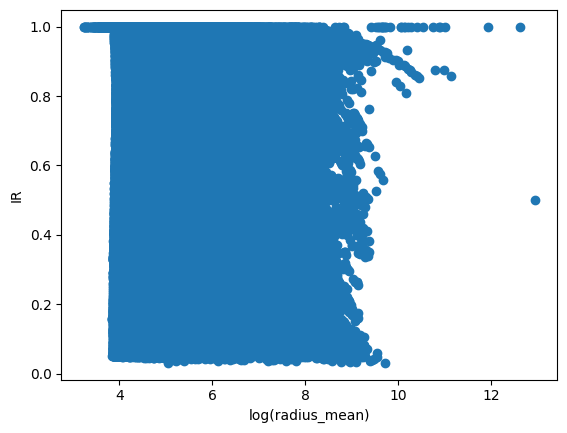

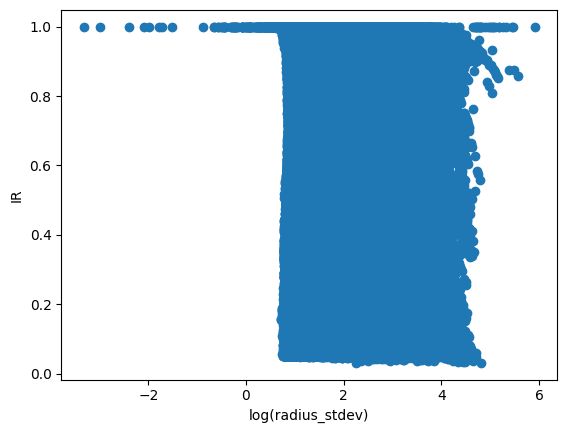

In [17]:
for x in non_constant_ivs:
    plt.scatter(np.log(stats_df[x]), stats_df.information_remaining)
    plt.xlabel(f"log({x})")
    plt.ylabel("IR")
    plt.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log10



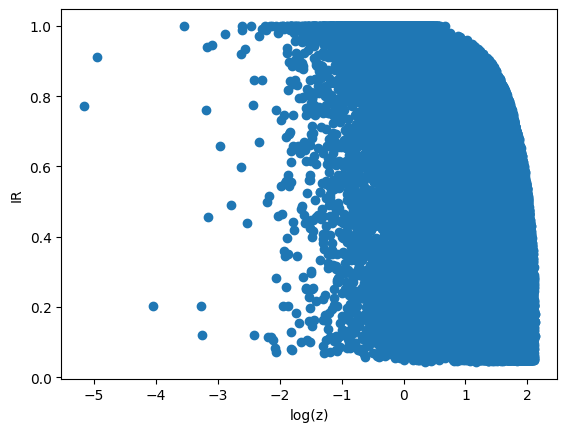

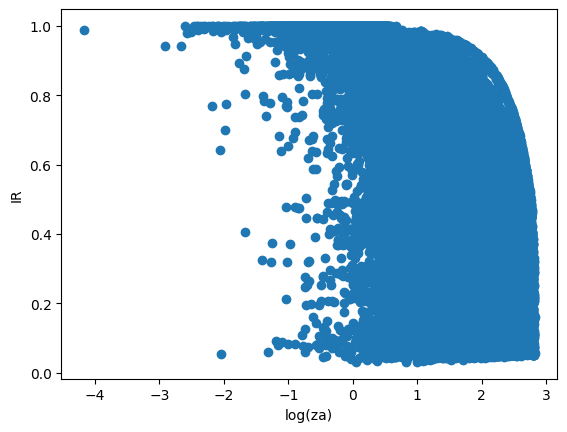

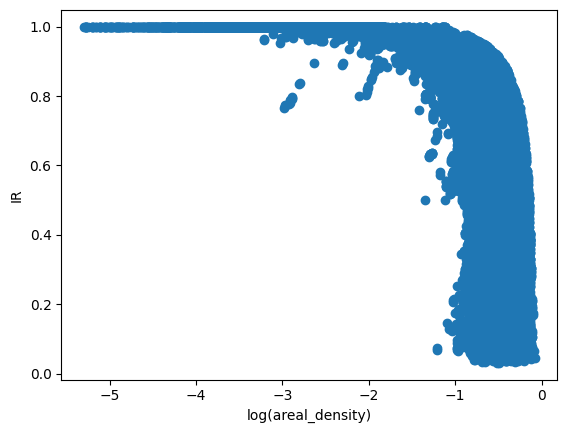

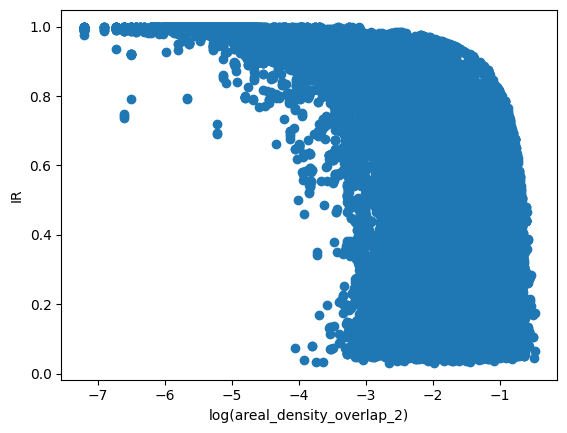

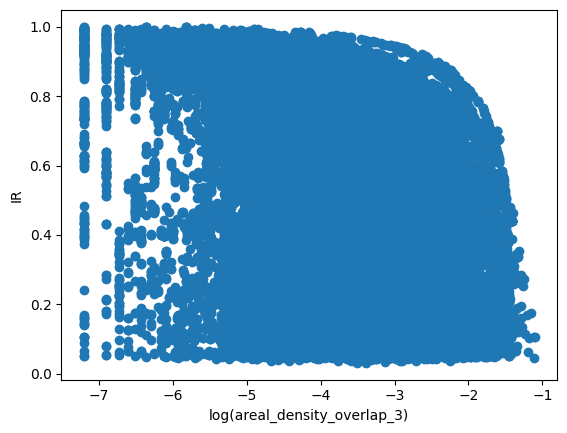

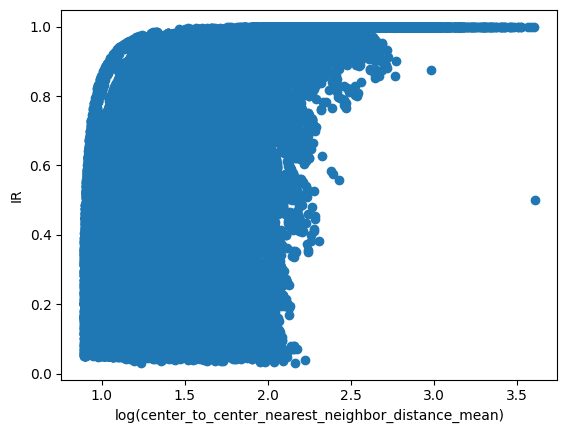

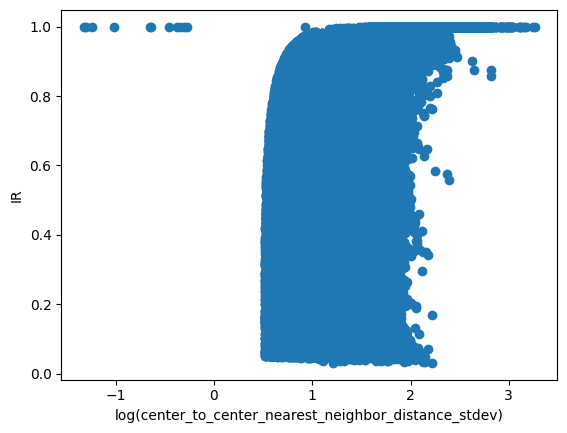

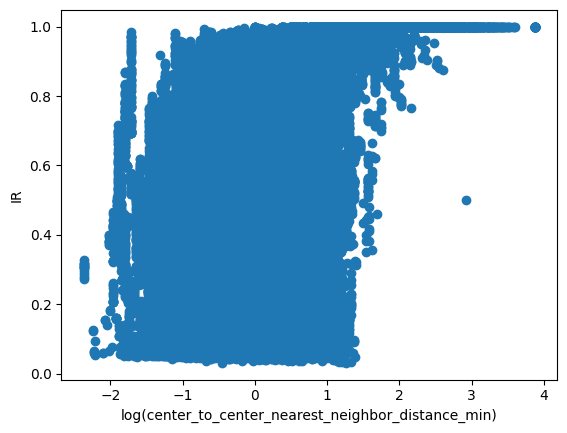

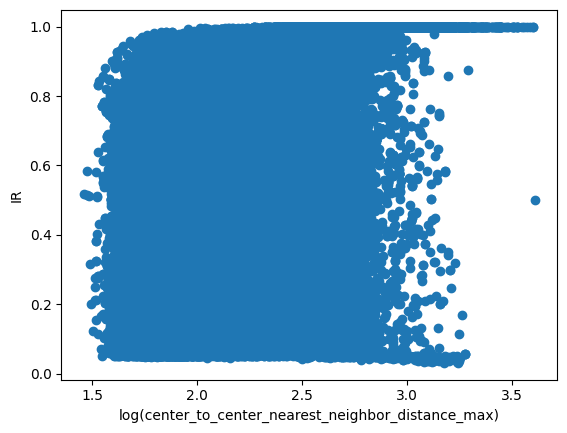

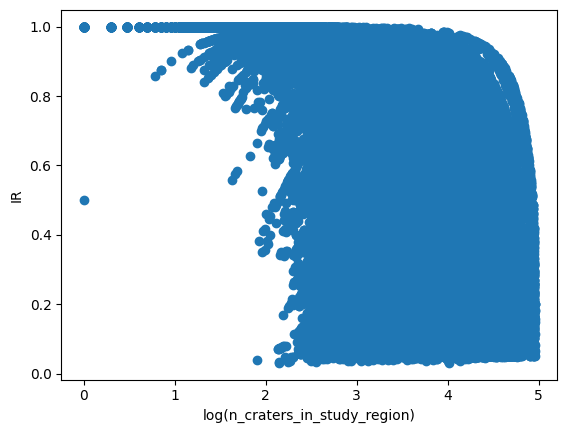

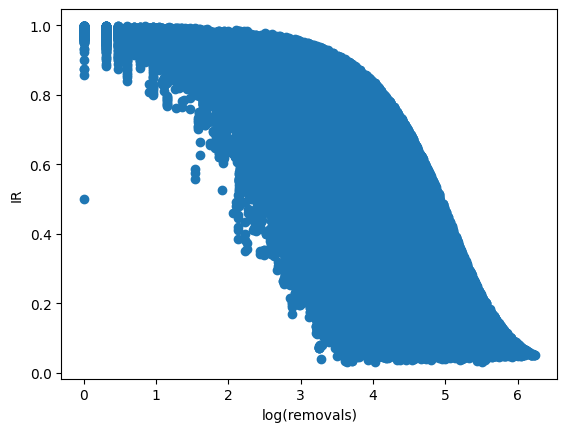

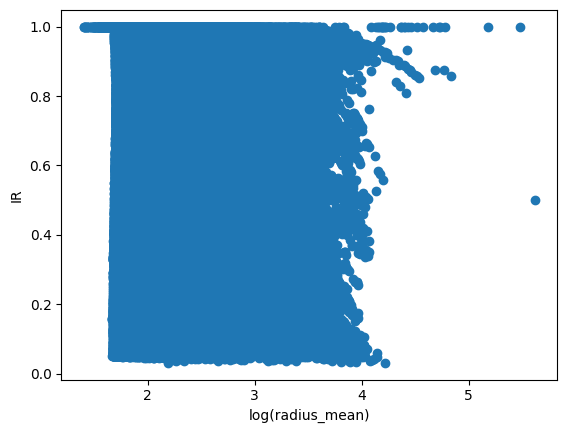

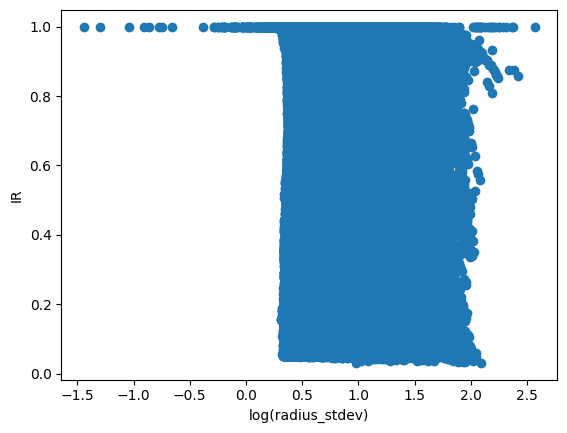

In [18]:
for x in non_constant_ivs:
    plt.scatter(np.log10(stats_df[x]), stats_df.information_remaining)
    plt.xlabel(f"log({x})")
    plt.ylabel("IR")
    plt.show()

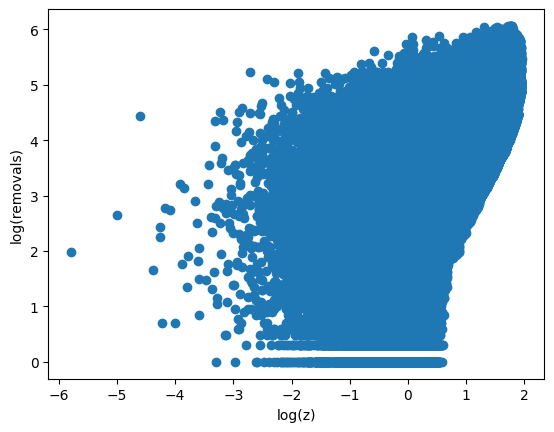

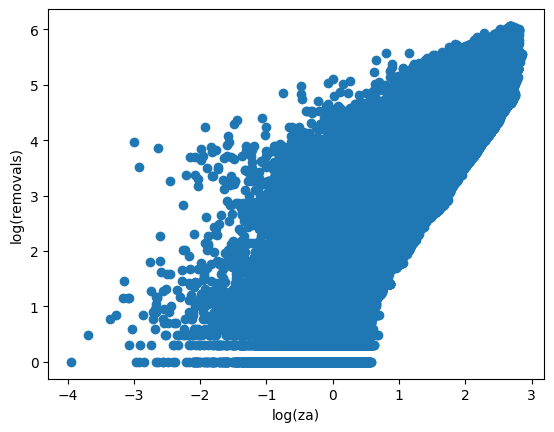

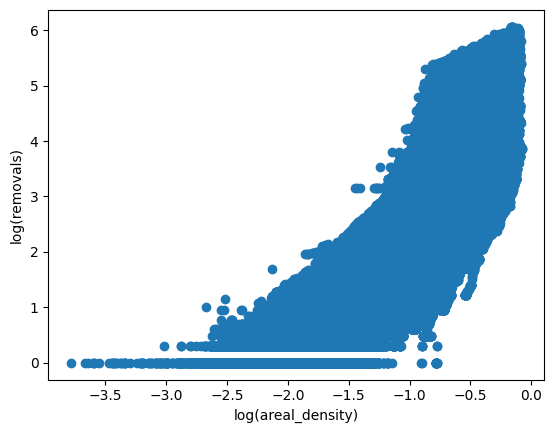

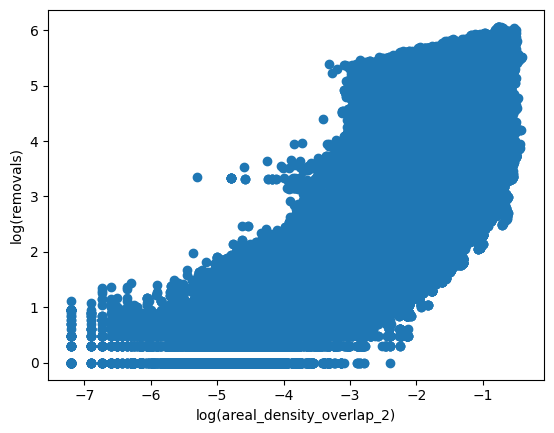

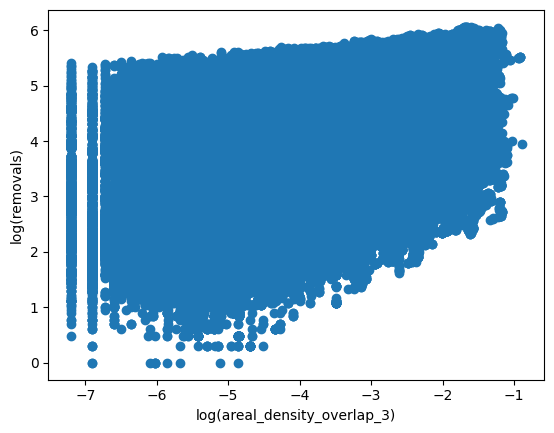

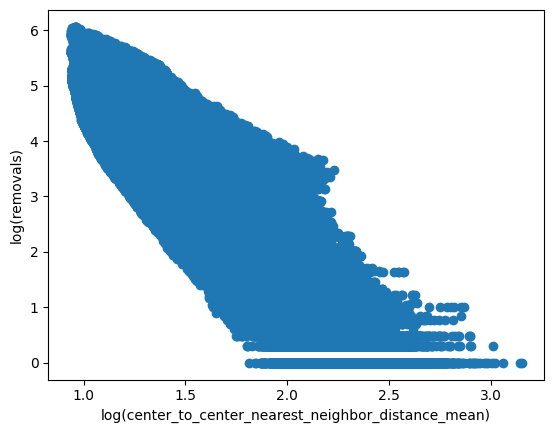

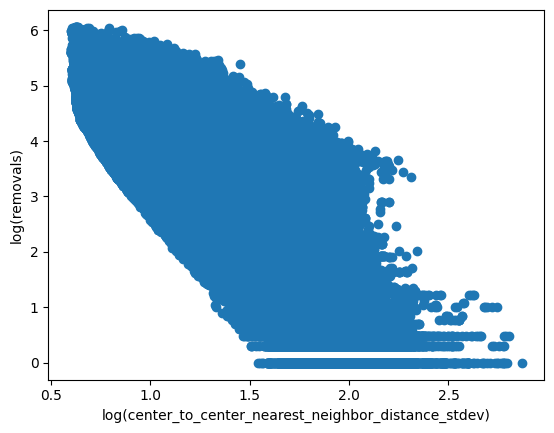

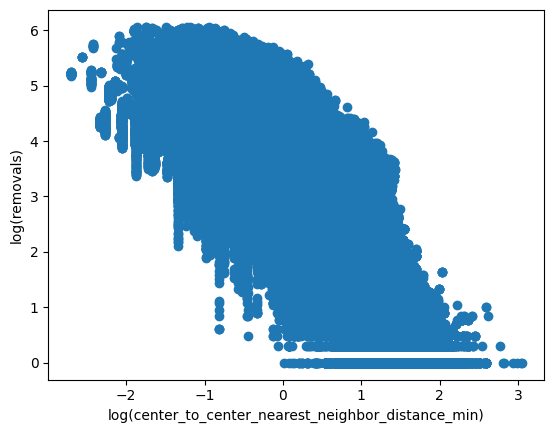

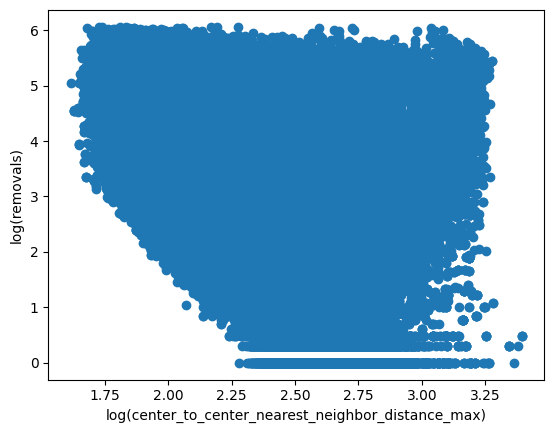

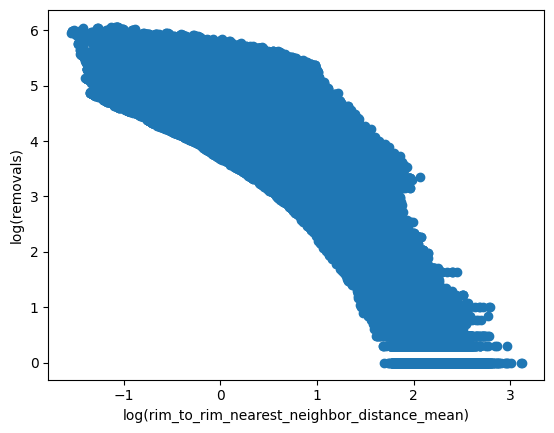

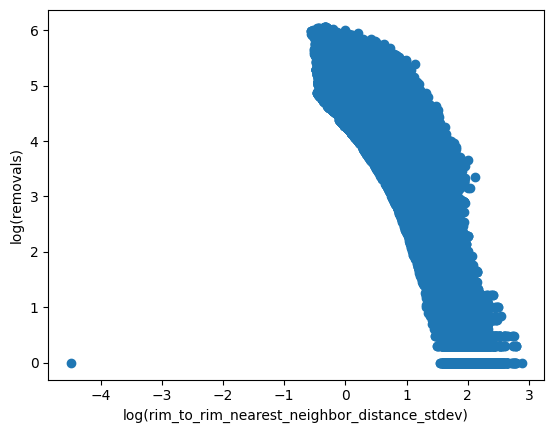

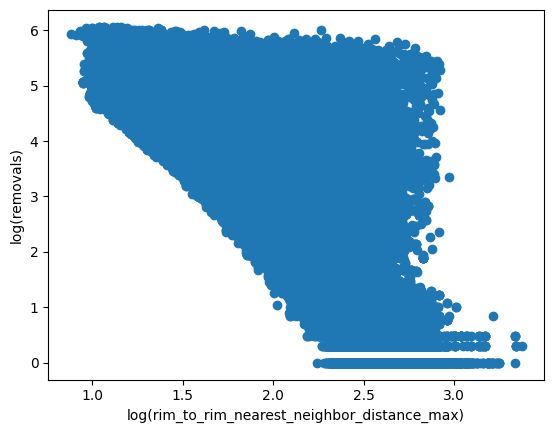

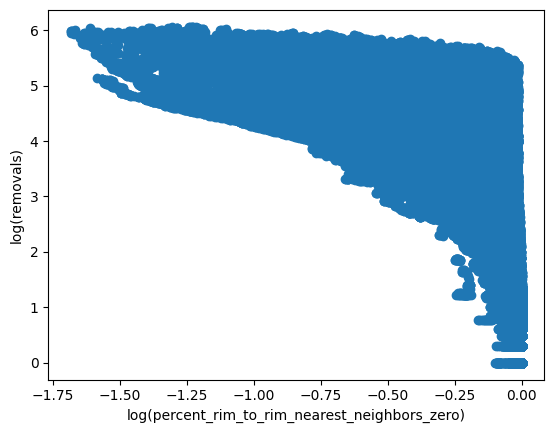

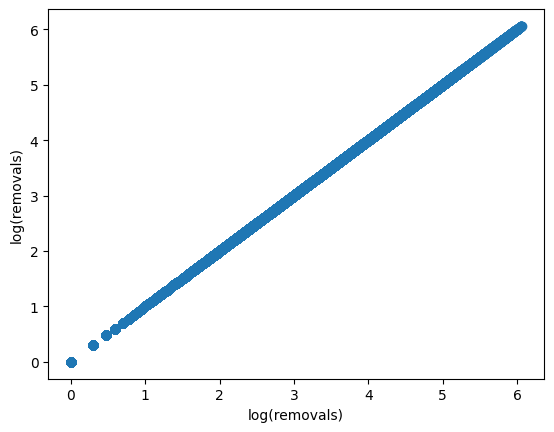

In [11]:
for x in non_constant_ivs:
    plt.scatter(np.log10(stats_df[x]), np.log10(stats_df.removals))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(removals)")
    plt.show()

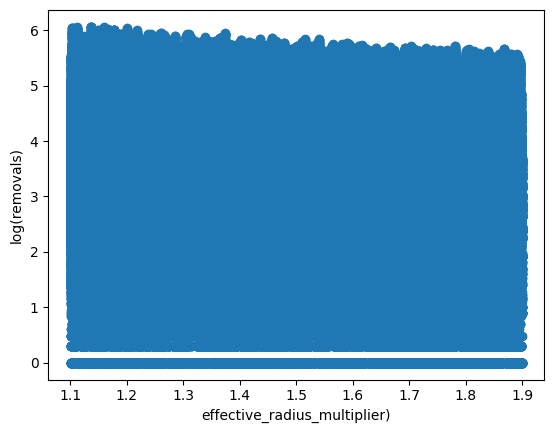

In [12]:
plt.scatter(stats_df.effective_radius_multiplier, np.log10(stats_df.removals))
plt.xlabel(f"effective_radius_multiplier)")
plt.ylabel("log(removals)")
plt.show()

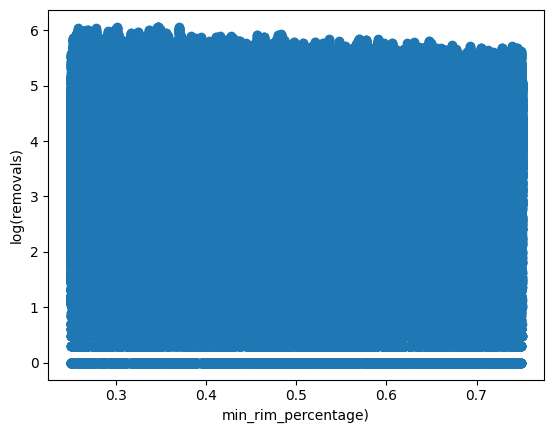

In [13]:
plt.scatter(stats_df.min_rim_percentage, np.log10(stats_df.removals))
plt.xlabel(f"min_rim_percentage)")
plt.ylabel("log(removals)")
plt.show()

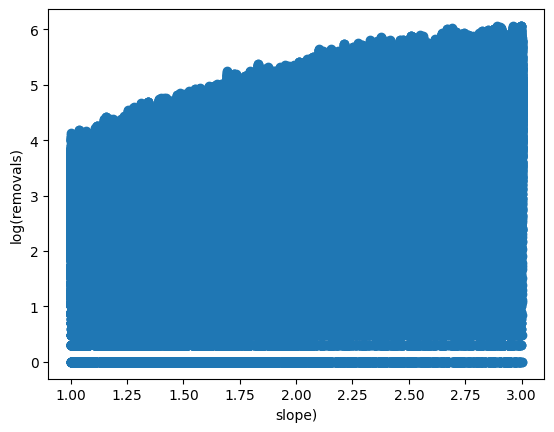

In [14]:
plt.scatter(stats_df.slope, np.log10(stats_df.removals))
plt.xlabel(f"slope)")
plt.ylabel("log(removals)")
plt.show()

In [596]:
# Failed experiment
df = stats_df[stats_df.simulation_id == 10].copy()
# df = stats_df[stats_df.information_remaining < 0.95]
# df = df.sample(df.shape[0] // 10).copy()

x_min = 5
mean_r_sq = (df.slope + 1) / df.slope * x_min**2
df["destruction_rate"] = mean_r_sq * df.effective_radius_multiplier ** 2 * df.min_rim_percentage * df.n_craters_in_study_region

fig = px.scatter(
    df,
    x="removals",
    y="destruction_rate",
    hover_data=ivs + ["removals"],
    size_max=0.25,
    color="areal_density"
)
fig.show()

# plt.scatter(df.information_remaining, destruction)
# plt.xlabel("IR")
# plt.ylabel("destruction")
# plt.show()

In [19]:
def plot_n_destruction_and_ad_for_simulation(simulation_id: int, stats_df: pd.DataFrame):
    df = stats_df[stats_df.simulation_id == simulation_id]
    df.head()
    
    print(df[["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage"]].iloc[0])
    
    fig = plt.figure(figsize=(18, 4))
    ax1 = fig.add_subplot(121)
    
    plt1 = ax1.plot(df.n_craters_added_in_study_region, df.destruction_rate, color='red', label="Destruction Rate")
    ax1.set_ylabel("Destruction Rate")
    ax1.set_xlabel("N Craters Added")
    
    ax2 = ax1.twinx()
    plt2 = ax2.plot(df.n_craters_added_in_study_region, df.areal_density, color="blue", label="Areal Density")
    ax2.set_ylabel("Areal Density")
    
    lns = plt1 + plt2
    ax1.legend(lns, [l.get_label() for l in lns], loc=4)
    
    ax1.set_title(f"Simulation {simulation_id}")


    ax1 = fig.add_subplot(122)
    
    plt1 = ax1.plot(df.n_craters_added_in_study_region, df.information_remaining, color='red', label="Information Remaining")
    ax1.set_ylabel("Information Remaining")
    ax1.set_xlabel("N Craters Added")
    
    ax2 = ax1.twinx()
    plt2 = ax2.plot(df.n_craters_added_in_study_region, df.n_craters_in_study_region, color="blue", label="N Craters Remaining")
    ax2.set_ylabel("Areal Density")
    
    lns = plt1 + plt2
    ax1.legend(lns, [l.get_label() for l in lns], loc=4)
    
    ax1.set_title(f"Simulation {simulation_id}")
    plt.show()

slope                          2.379151
effective_radius_multiplier    1.830918
r_stat_multiplier              3.705921
min_rim_percentage             0.609755
Name: 37723, dtype: float64


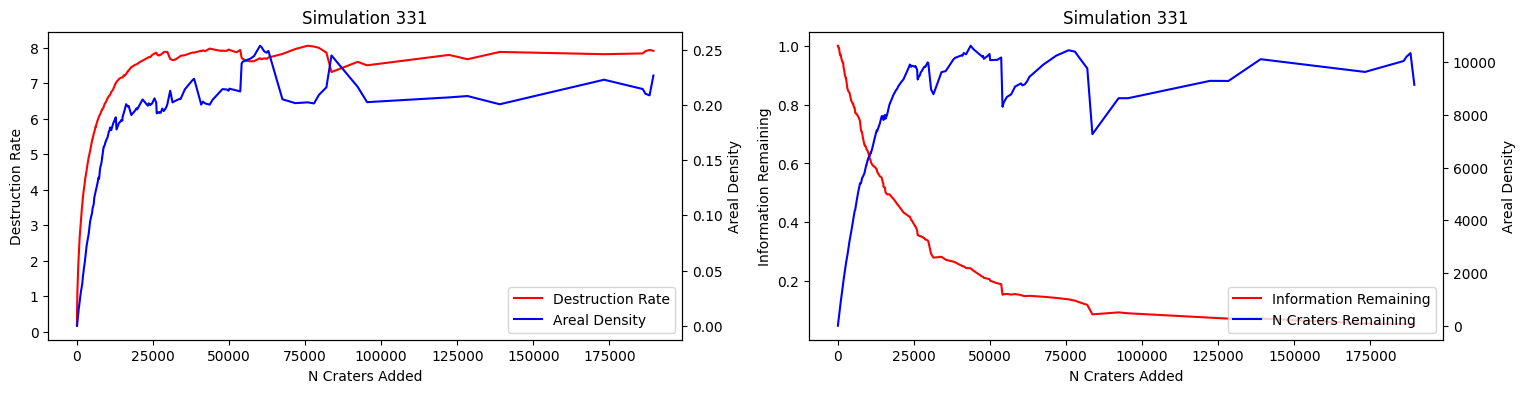

slope                          2.183483
effective_radius_multiplier    1.802553
r_stat_multiplier              4.604947
min_rim_percentage             0.349277
Name: 30938, dtype: float64


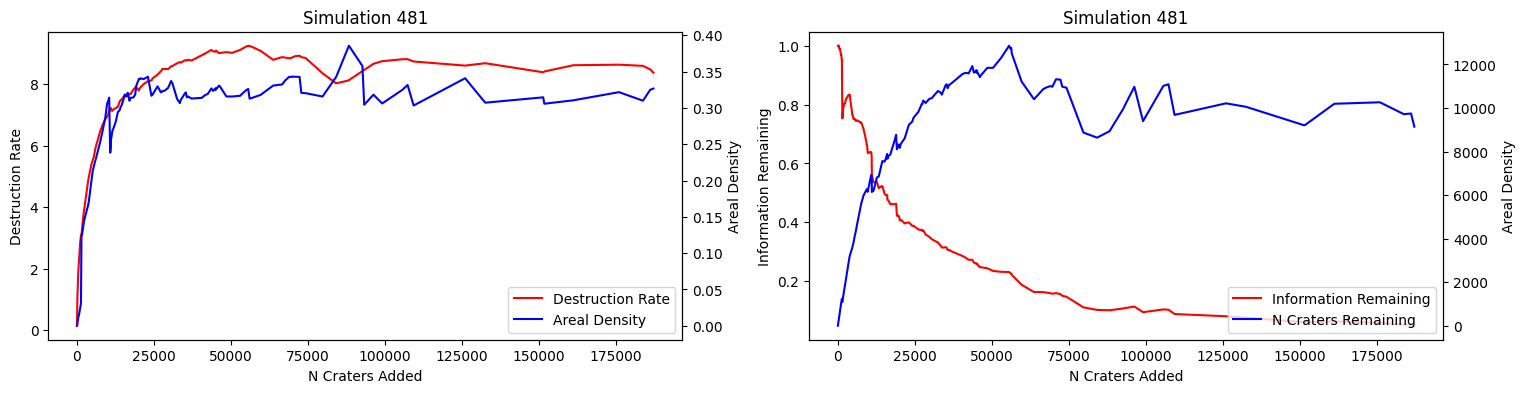

slope                          3.473681
effective_radius_multiplier    1.855363
r_stat_multiplier              3.102627
min_rim_percentage             0.683572
Name: 76650, dtype: float64


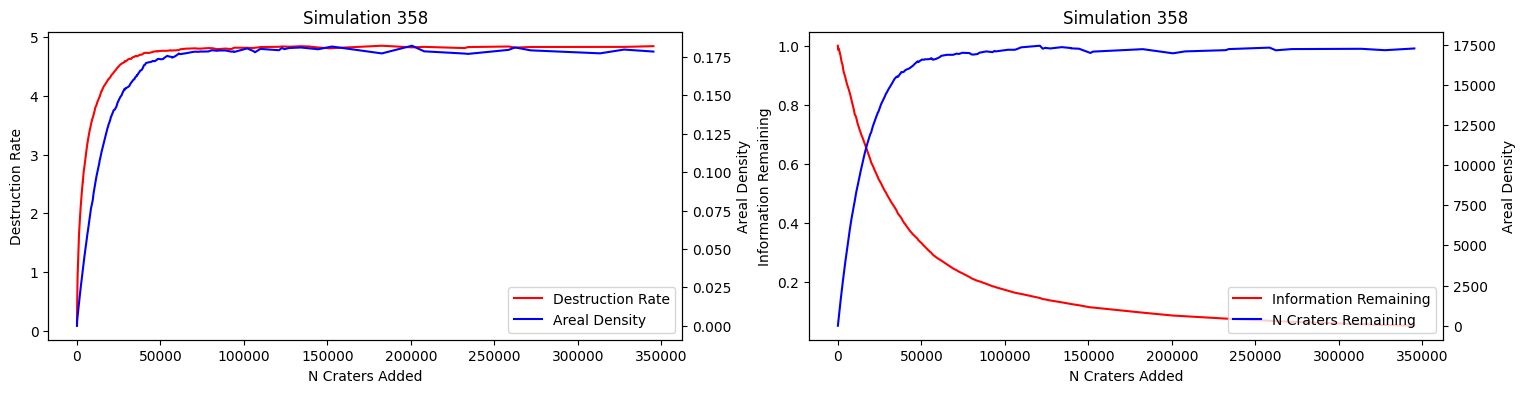

slope                          2.280017
effective_radius_multiplier    1.371279
r_stat_multiplier              3.094473
min_rim_percentage             0.265047
Name: 23483, dtype: float64


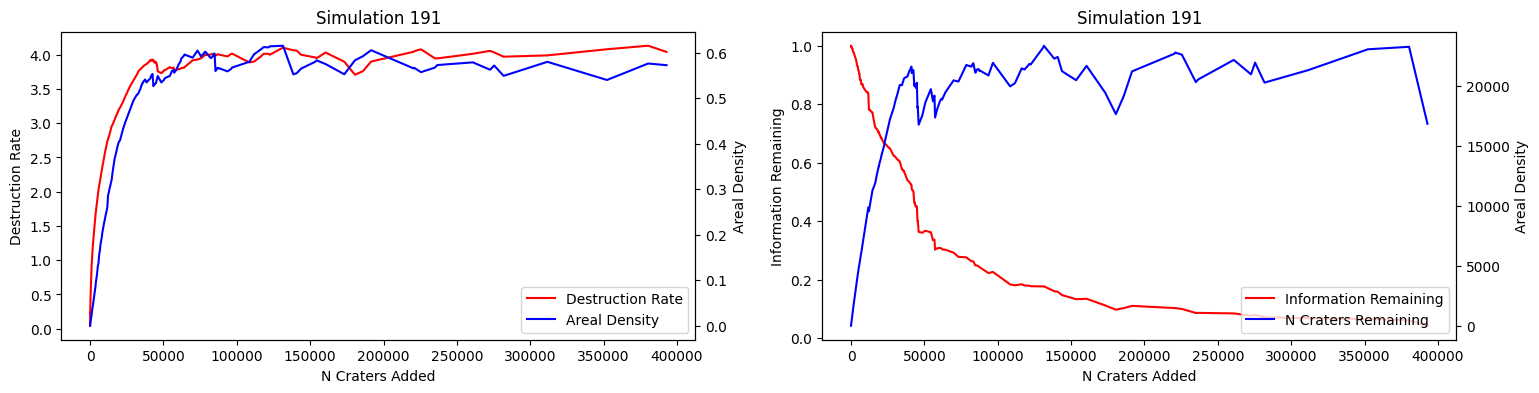

slope                          2.507509
effective_radius_multiplier    1.709712
r_stat_multiplier              4.284457
min_rim_percentage             0.494948
Name: 51239, dtype: float64


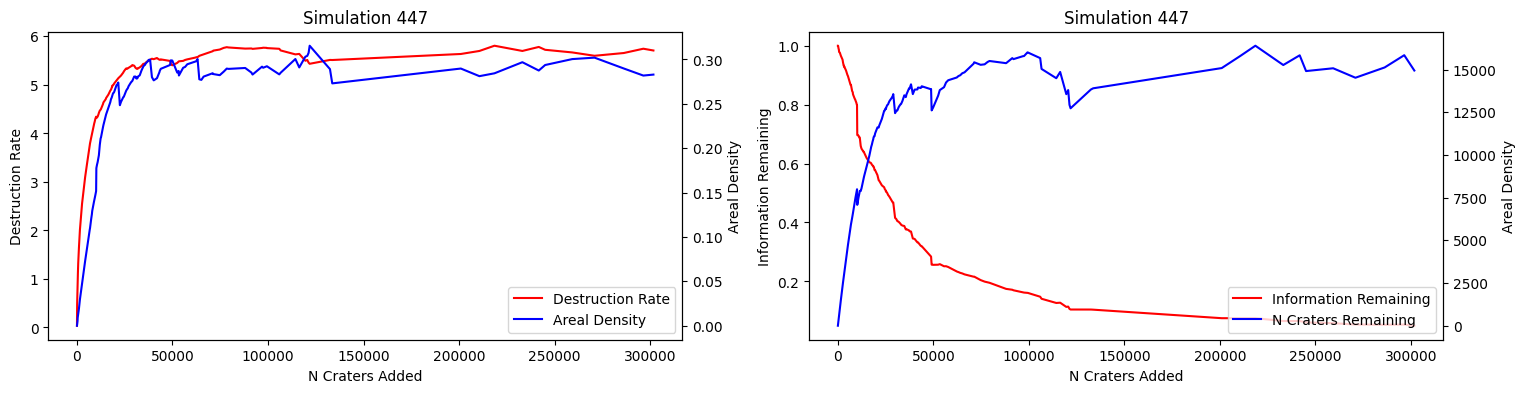

slope                          2.563796
effective_radius_multiplier    1.372220
r_stat_multiplier              8.643335
min_rim_percentage             0.474111
Name: 56989, dtype: float64


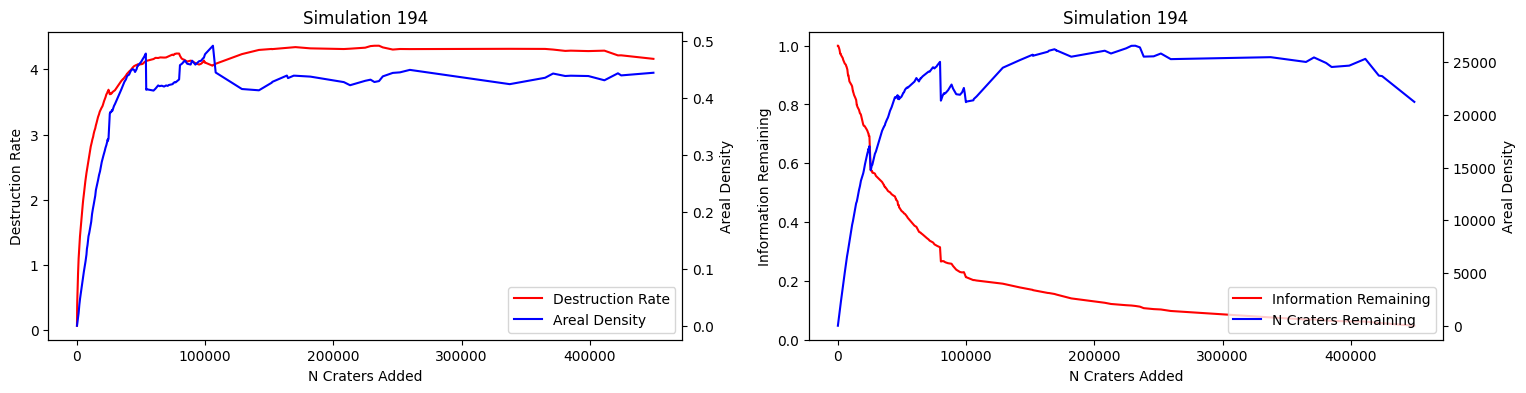

slope                          2.151018
effective_radius_multiplier    1.278616
r_stat_multiplier              3.364438
min_rim_percentage             0.698213
Name: 22220, dtype: float64


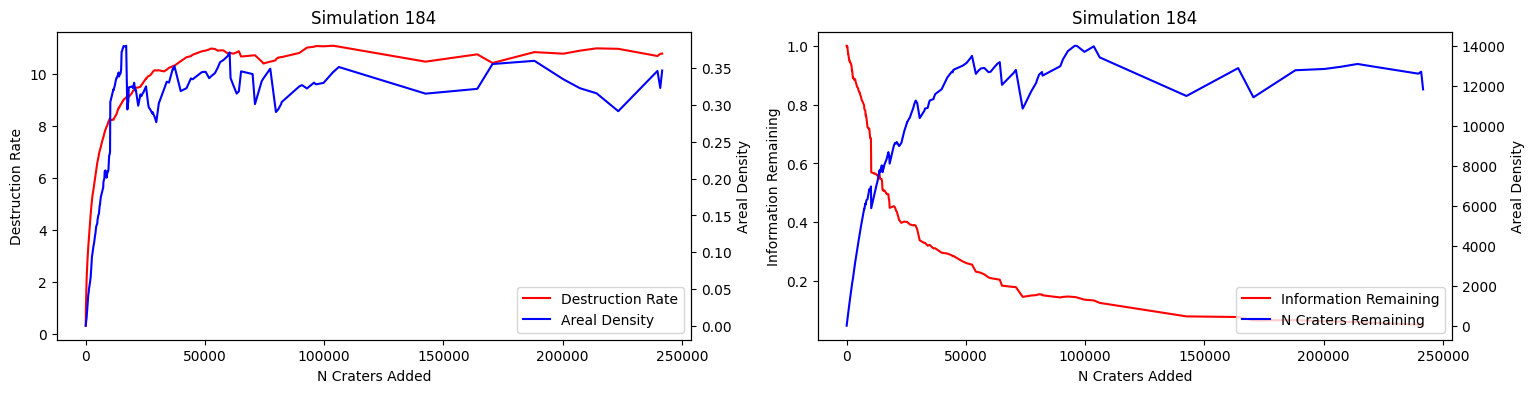

In [20]:
constant = 4000**2 / 300

df = stats_df[stats_df.slope > 2].copy()
ids = df.simulation_id.unique()

x_min = 5
mean_r_sq = (df.slope - 1) / (df.slope - 2) * x_min**2
df["destruction_rate"] = mean_r_sq * df.effective_radius_multiplier ** 2 * df.min_rim_percentage / df.center_to_center_nearest_neighbor_distance_mean

for x in range(8, 15):
    plot_n_destruction_and_ad_for_simulation(ids[x], df)

#### Plots of N vs IVs

Here, N = count of craters ever to hit the study region.

There appear to be relationships between several IVs and N:
- za: positive correlation
- areal_density: positive correlation

center-to-center and rim-to-rim distance metrics seem to tell a similar story as the IR plots: once crater destruction becomes a factor, N has larger variance. Perhaps examining plots where crater destruction has started will help?

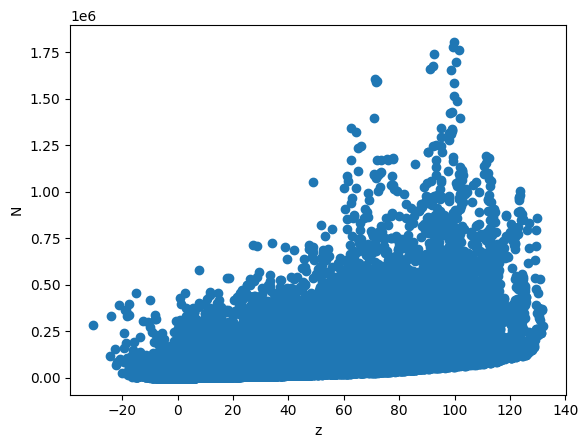

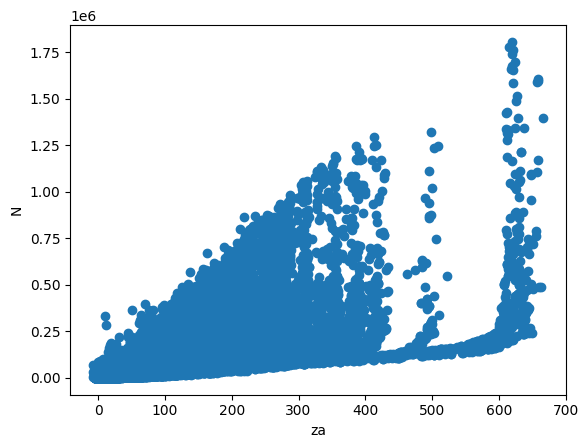

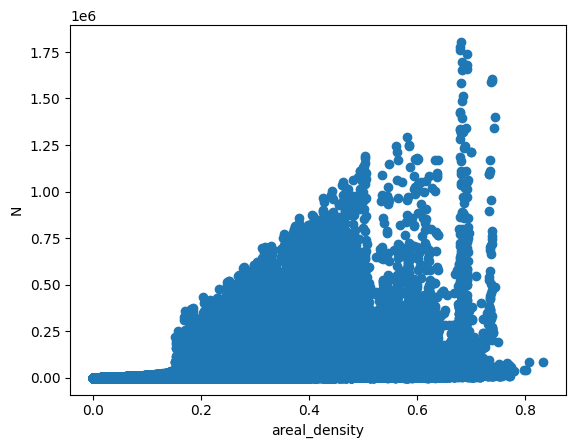

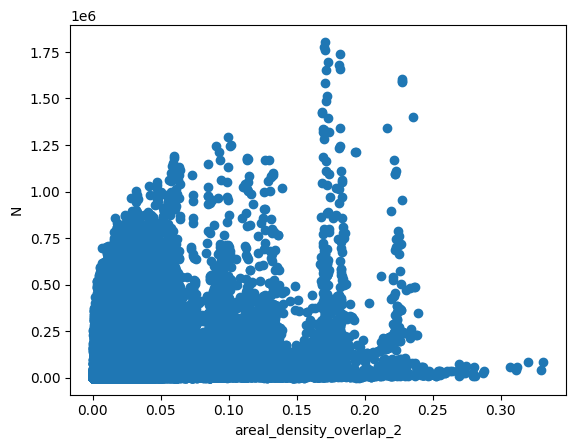

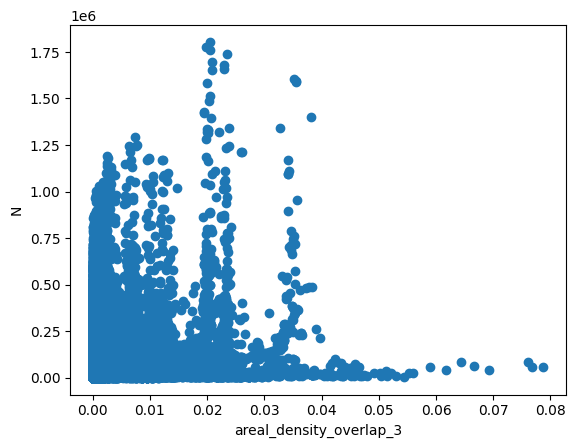

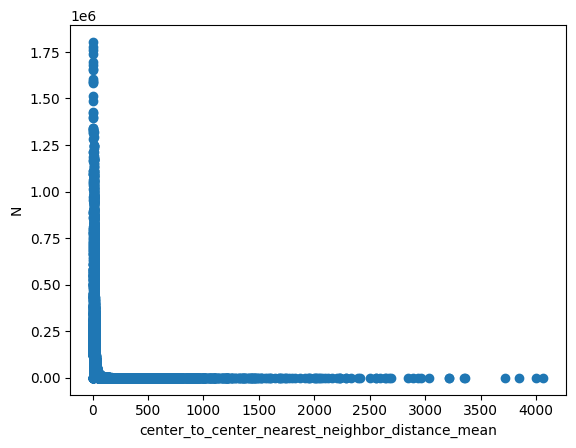

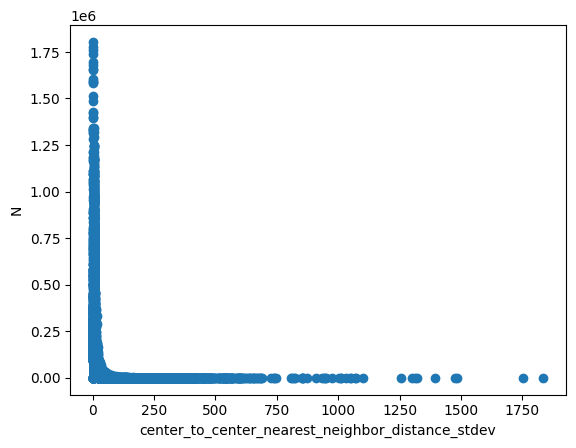

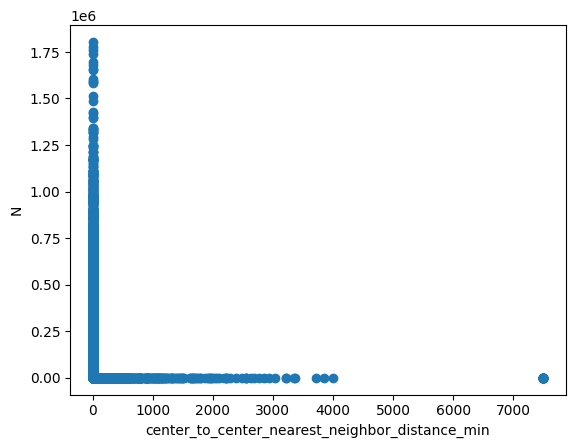

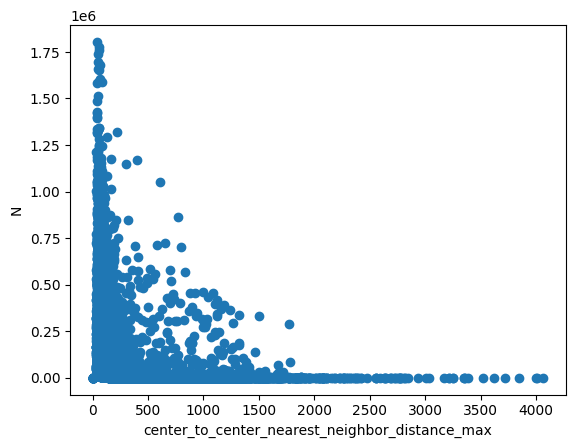

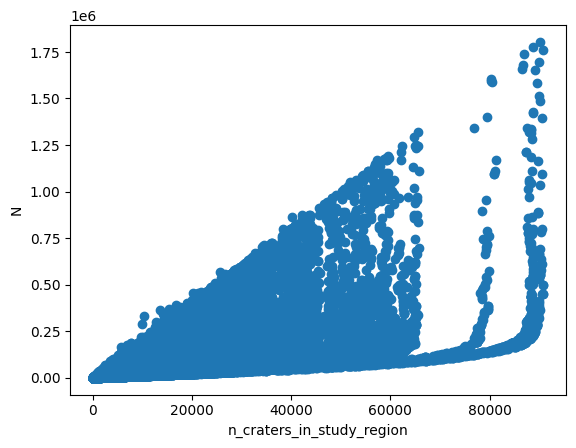

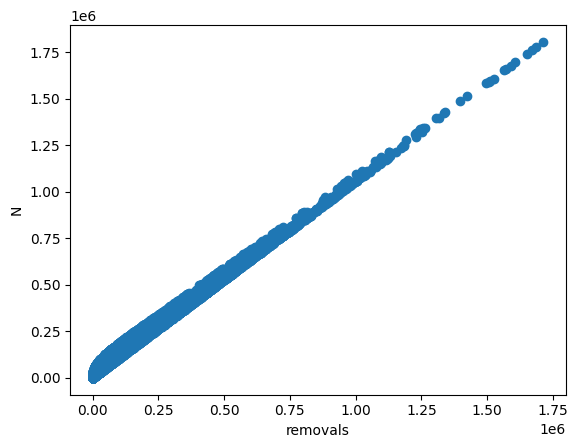

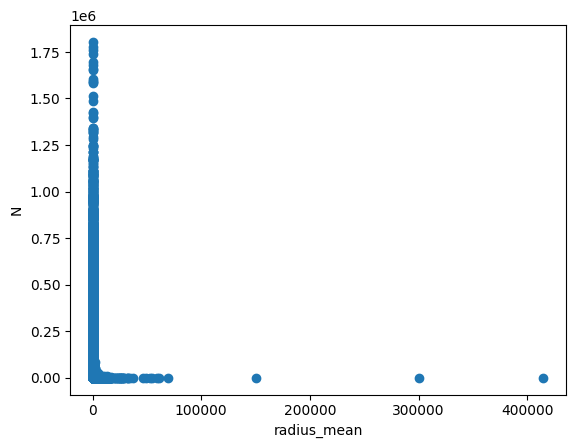

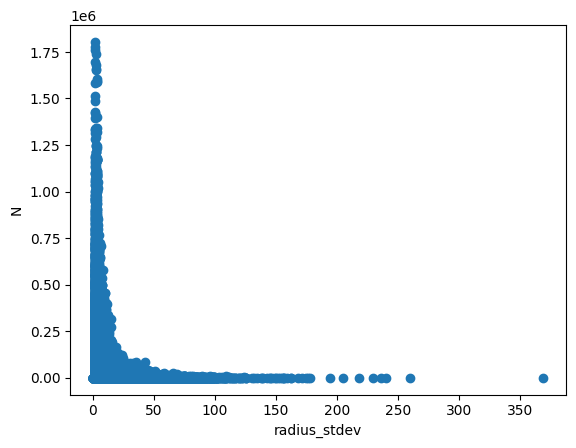

In [21]:
for x in non_constant_ivs:
    plt.scatter(stats_df[x], stats_df.n_craters_added_in_study_region)
    plt.xlabel(f"{x}")
    plt.ylabel("N")
    plt.show()

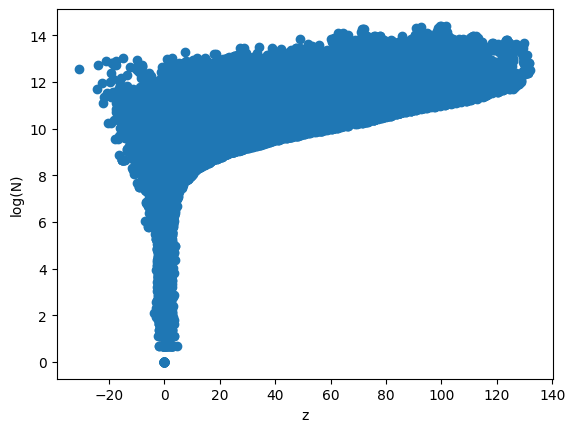

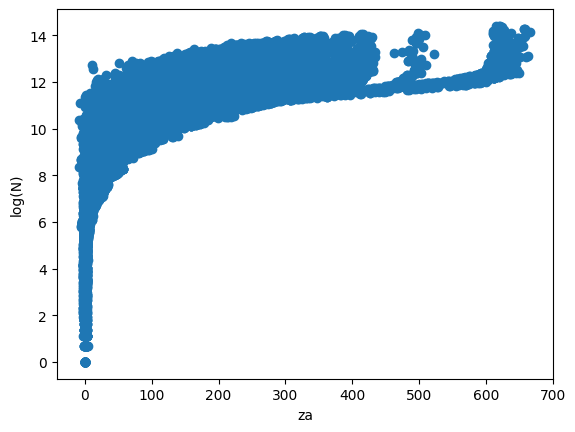

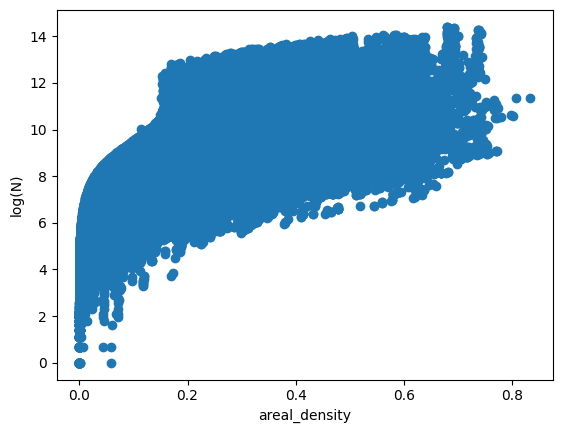

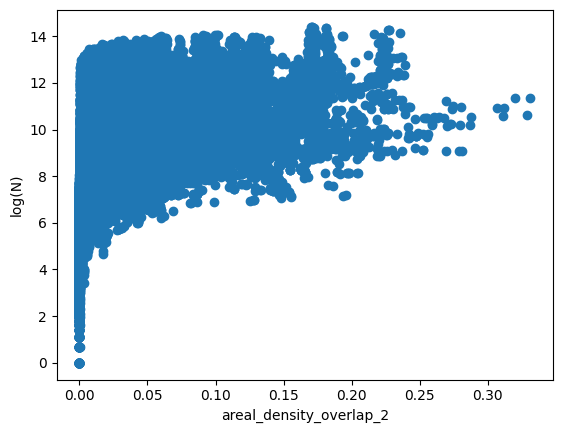

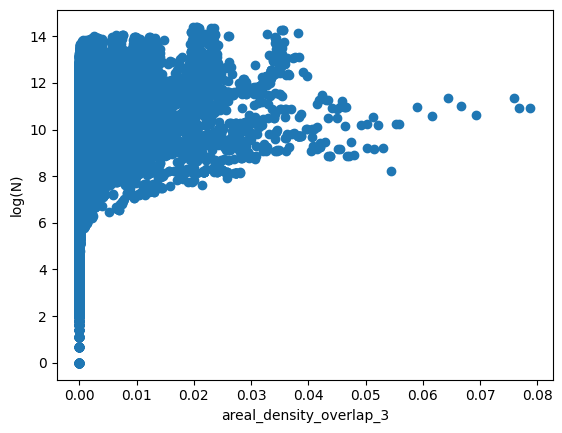

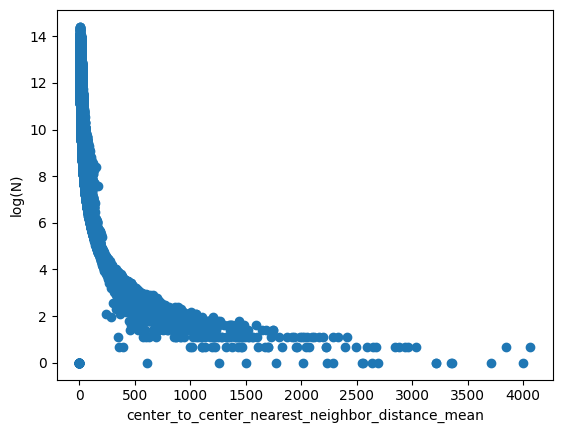

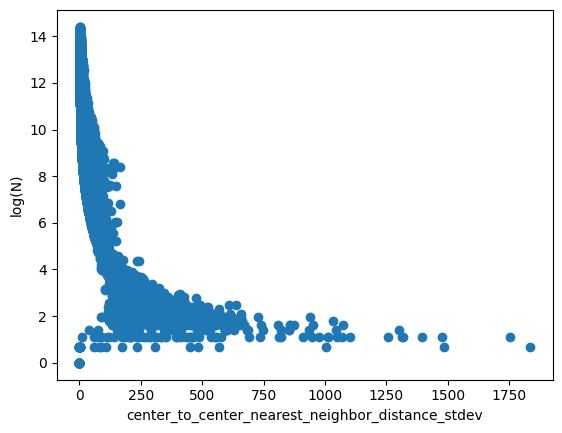

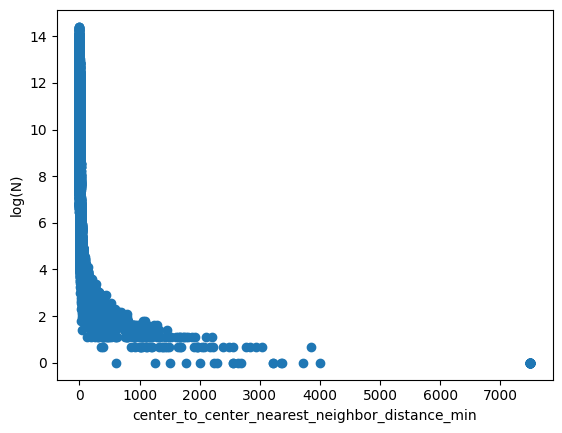

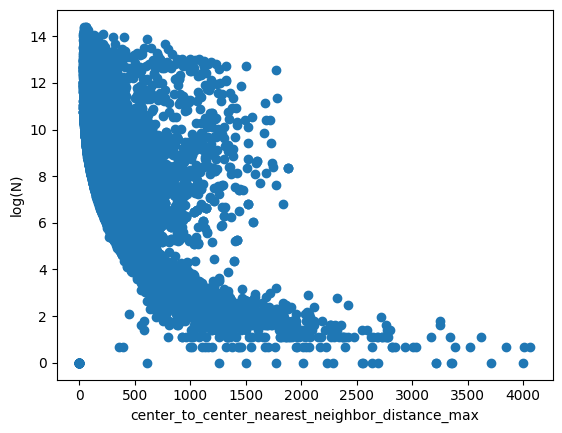

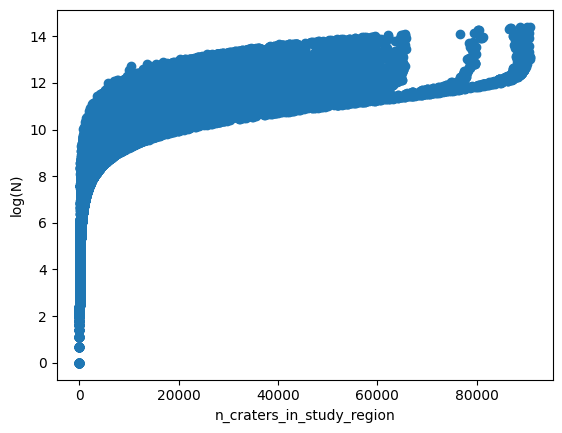

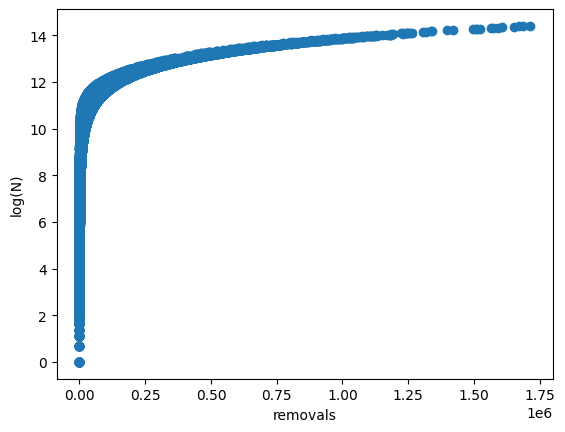

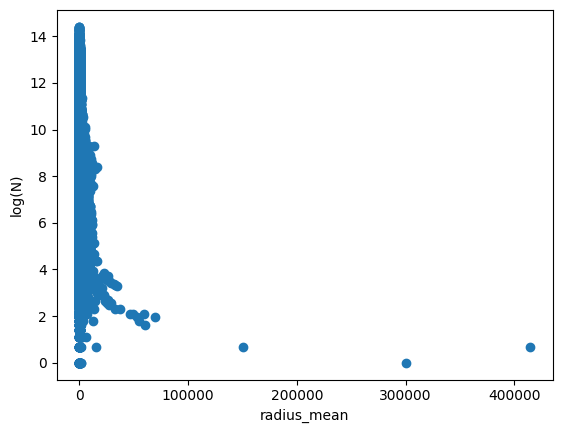

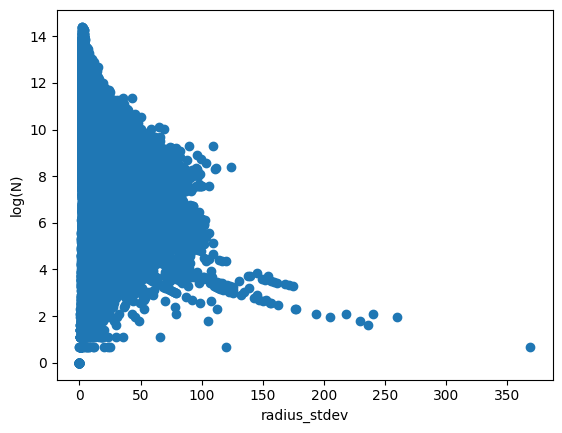

In [22]:
for x in non_constant_ivs:
    plt.scatter(stats_df[x], np.log(stats_df.n_craters_added_in_study_region))
    plt.xlabel(f"{x}")
    plt.ylabel("log(N)")
    plt.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



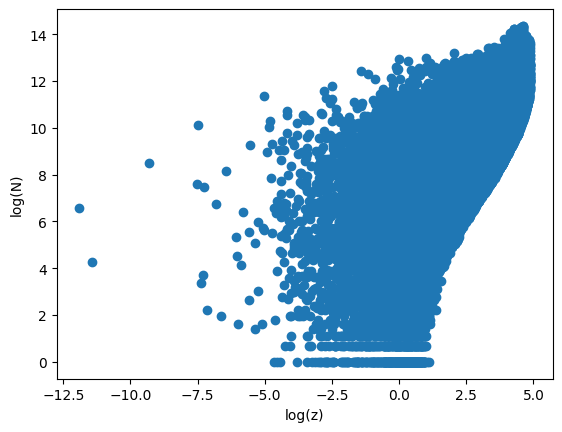

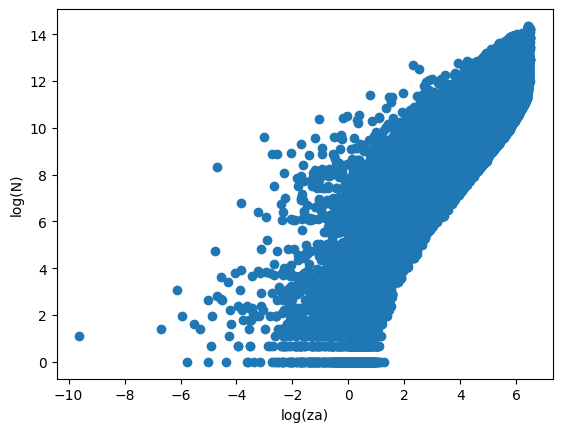

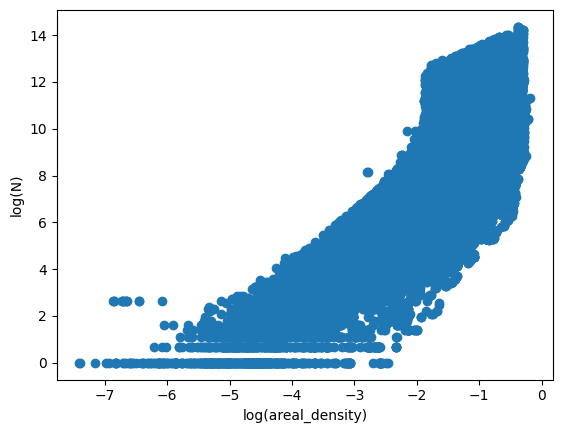

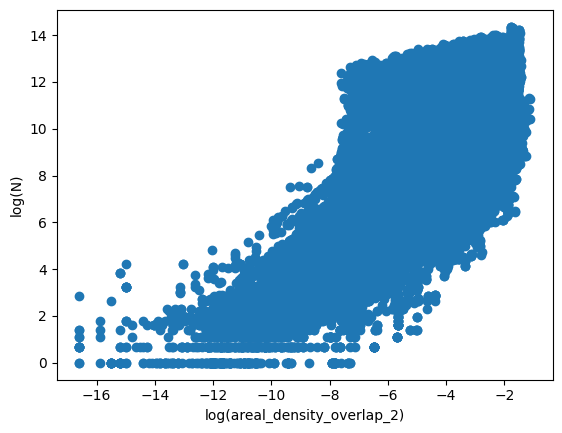

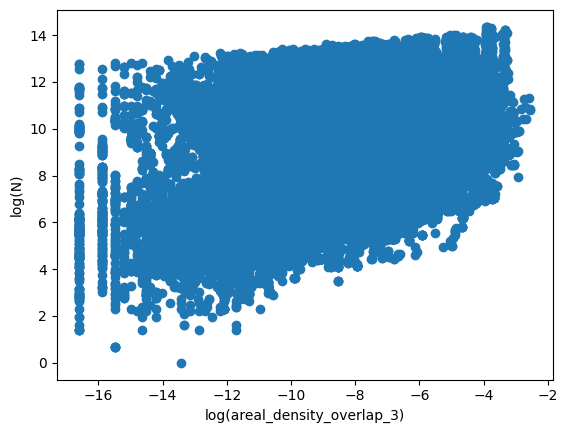

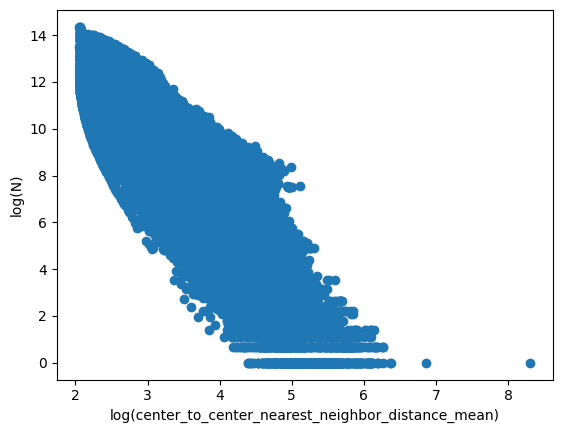

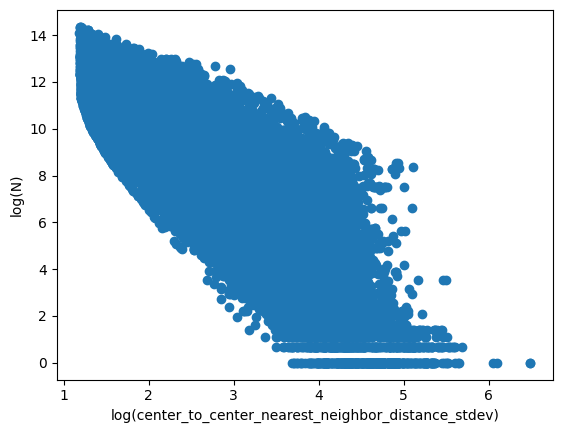

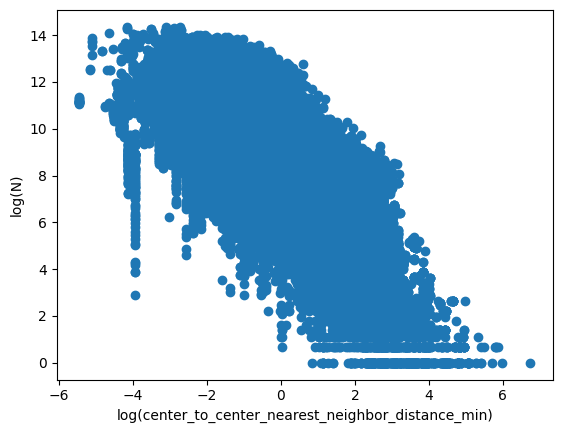

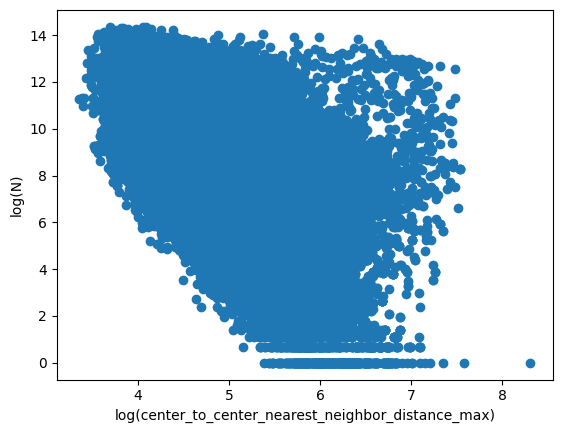

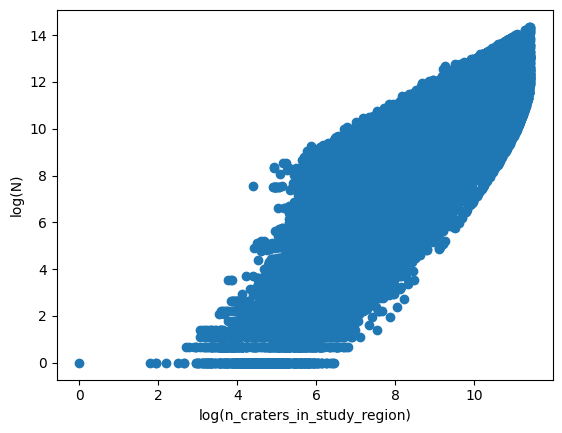

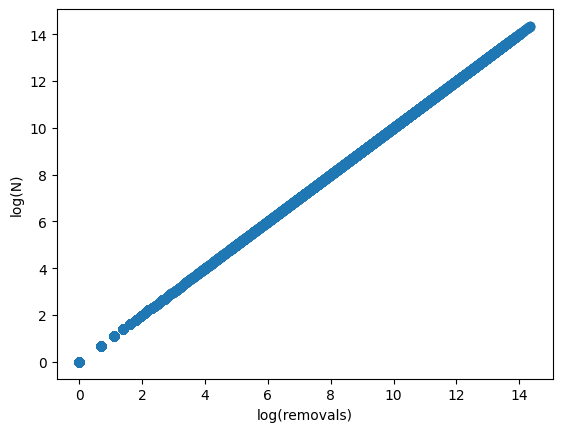

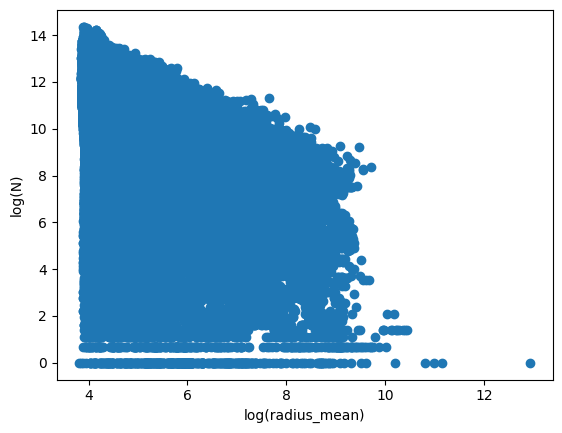

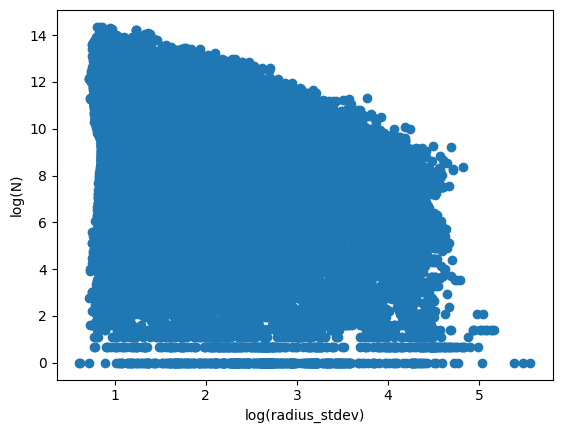

In [23]:
for x in non_constant_ivs:
    plt.scatter(np.log(stats_df[x]), np.log(stats_df.removals))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(N)")
    plt.show()

#### Plots of N vs IVs after crater destruction has started

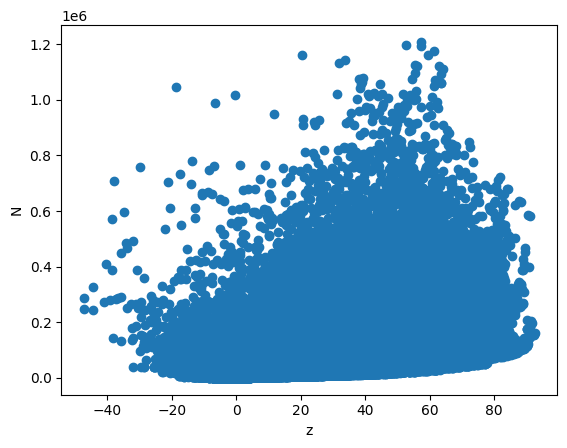

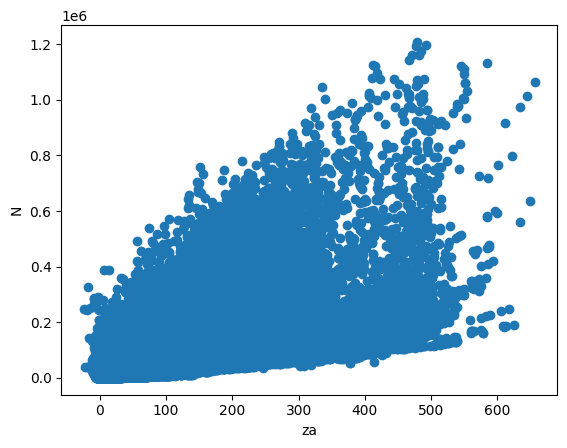

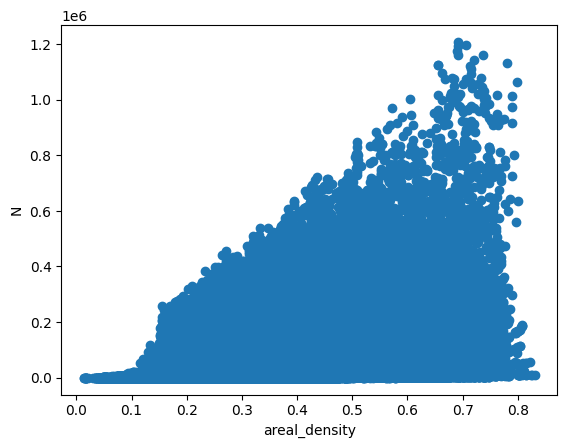

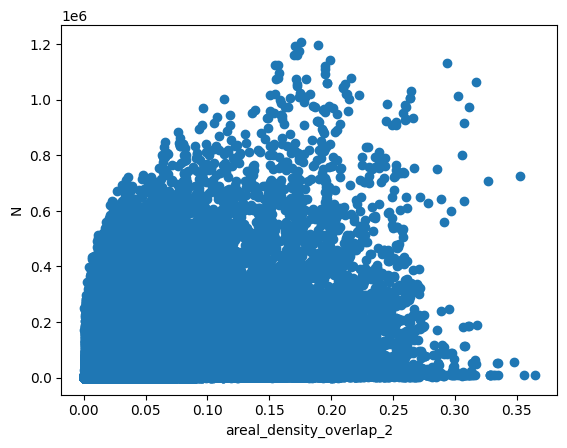

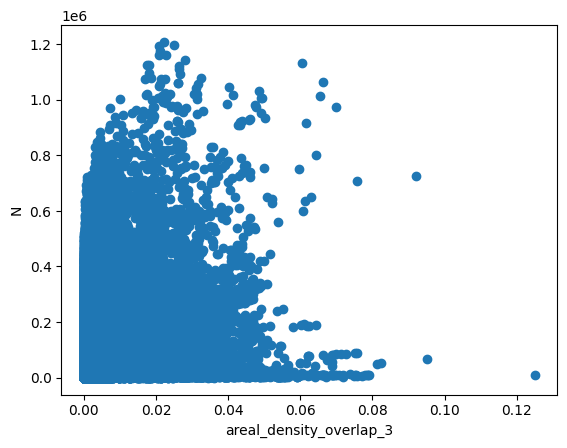

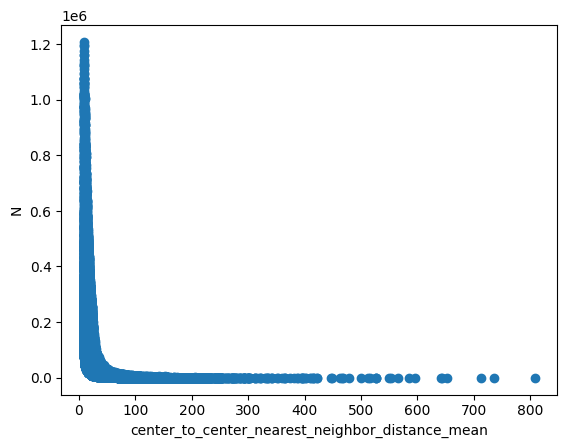

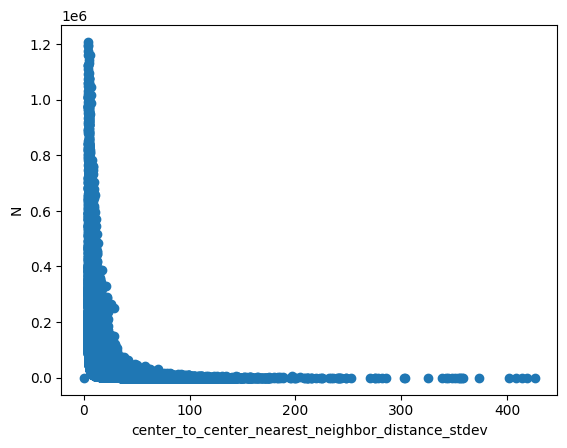

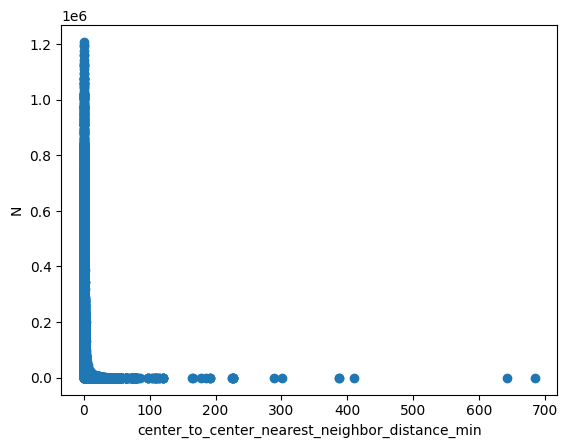

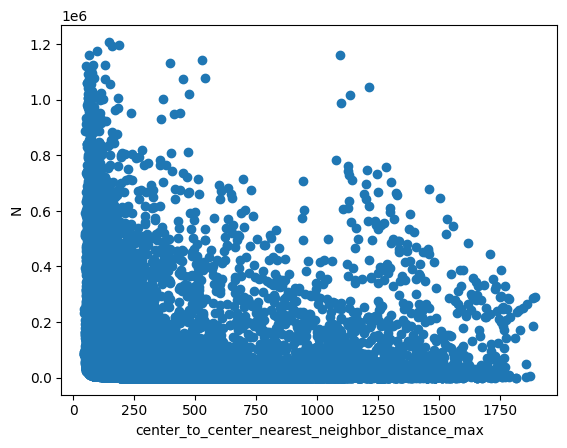

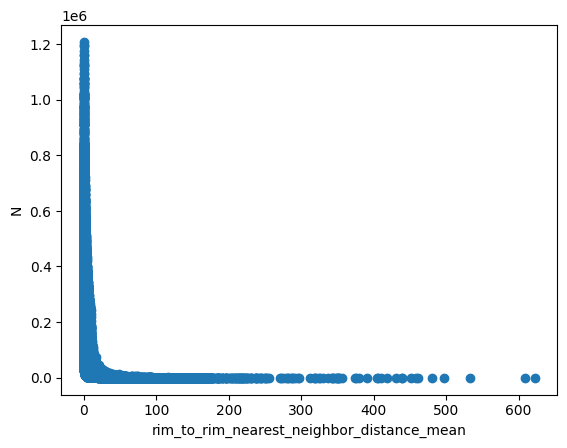

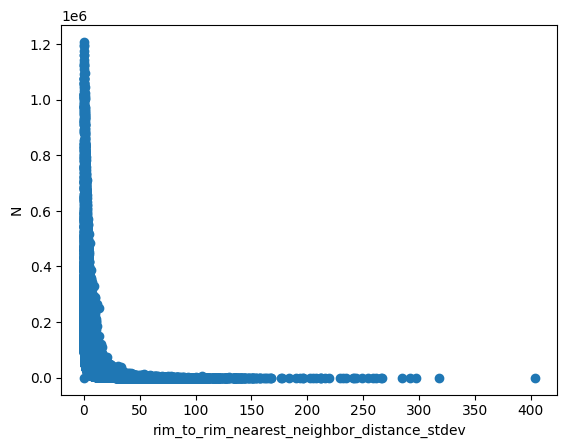

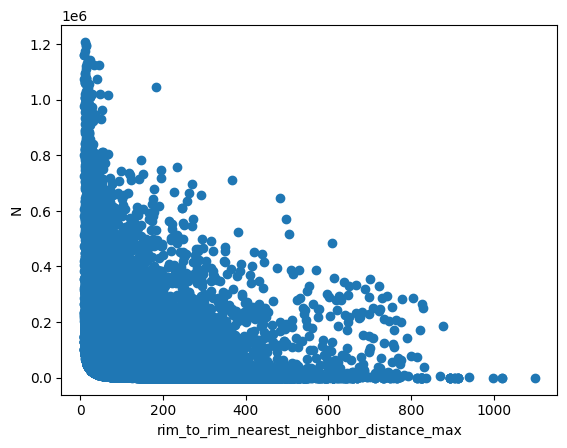

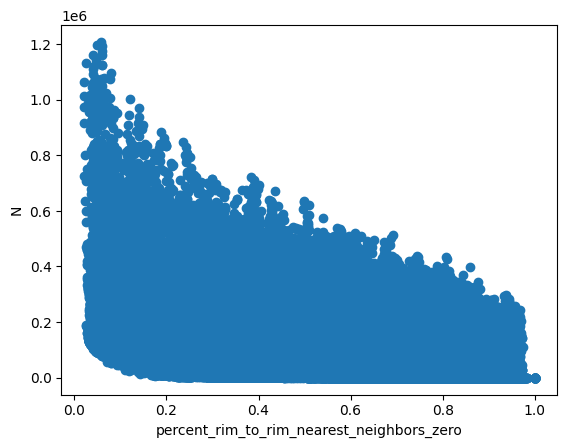

In [43]:
df = stats_df[stats_df.information_remaining < 0.8].copy()
for x in non_constant_ivs:
    plt.scatter(df[x], df.n_craters_added_in_study_region)
    plt.xlabel(f"{x}")
    plt.ylabel("N")
    plt.show()

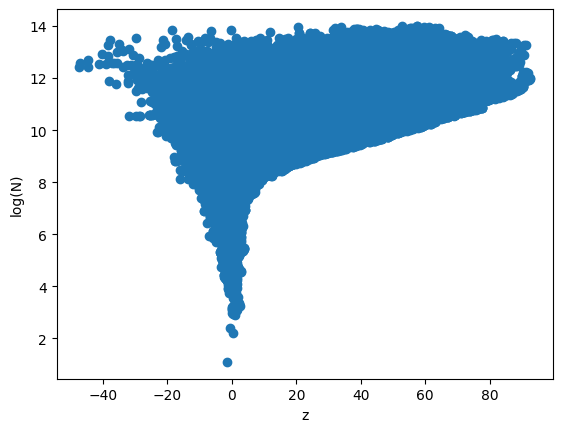

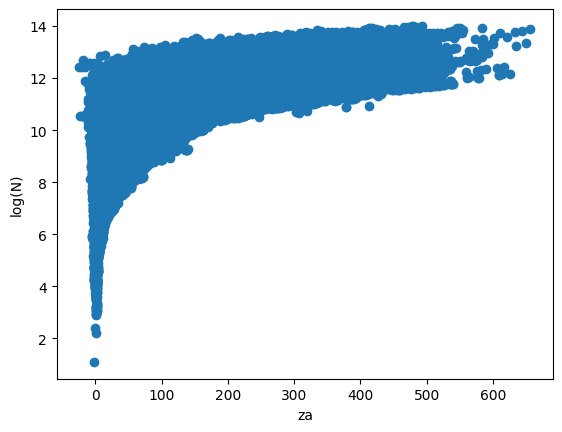

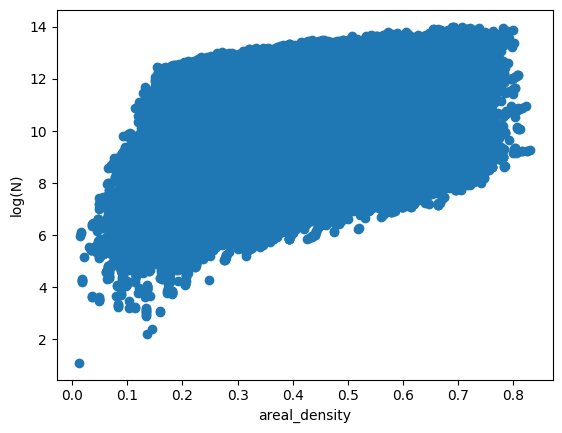

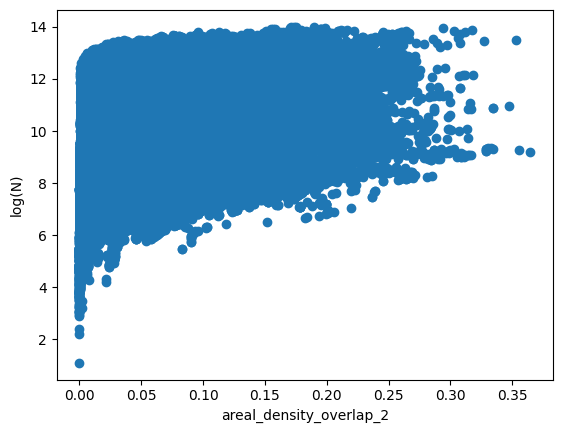

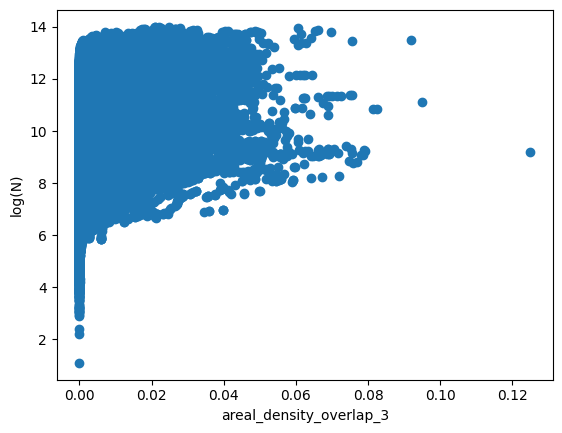

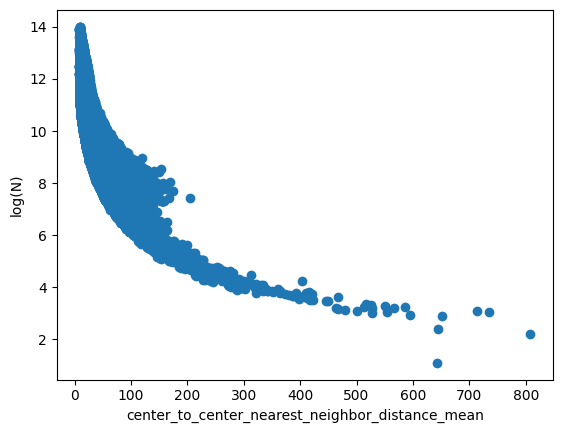

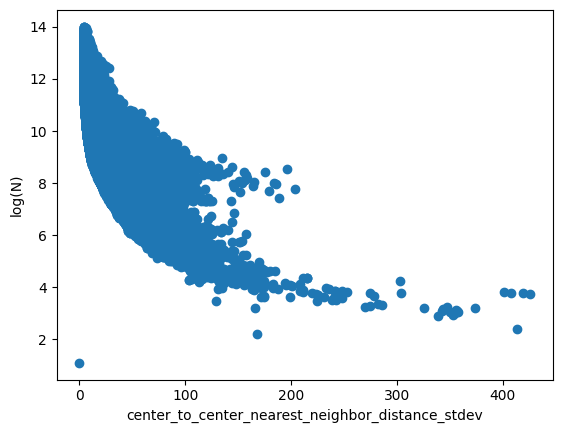

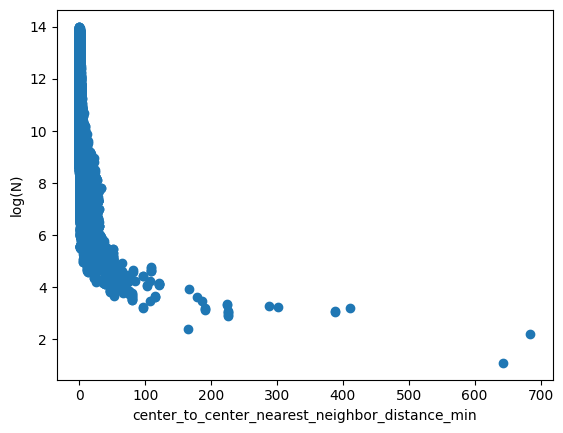

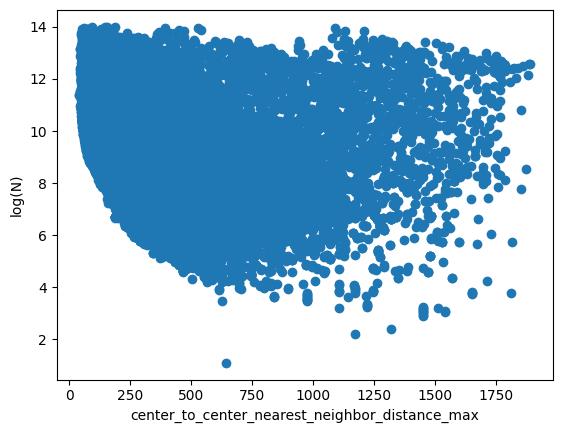

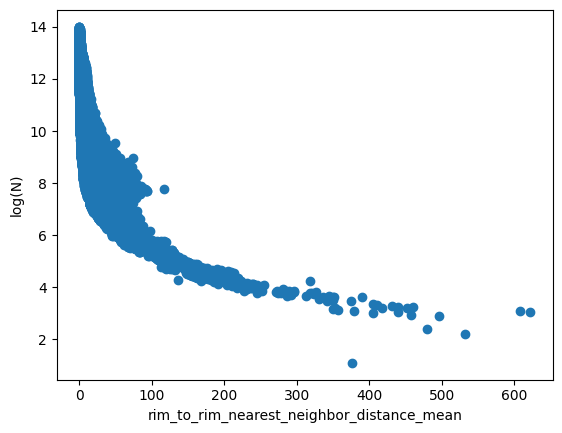

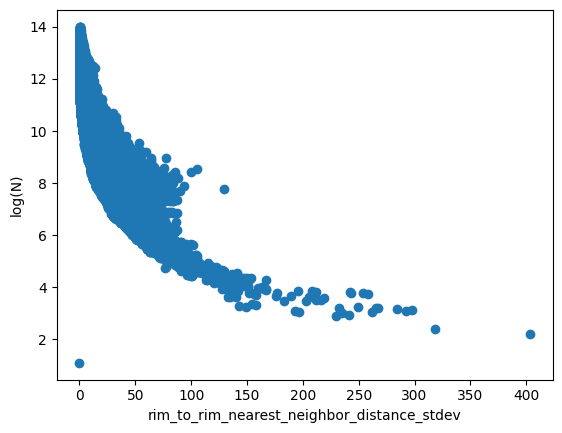

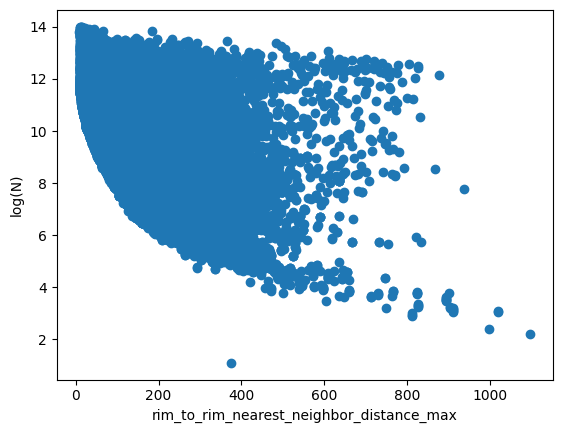

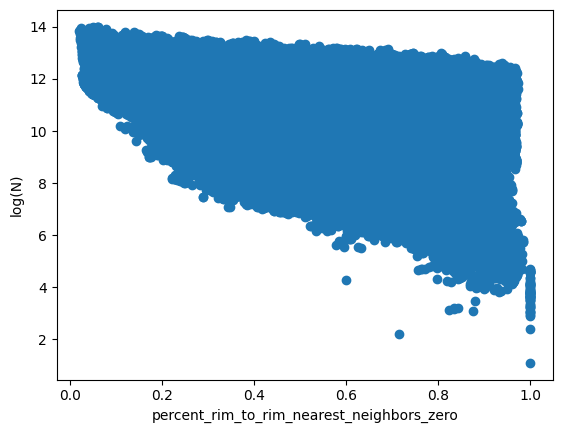

In [44]:
df = stats_df[stats_df.information_remaining < 0.8].copy()
for x in non_constant_ivs:
    plt.scatter(df[x], np.log(df.n_craters_added_in_study_region))
    plt.xlabel(f"{x}")
    plt.ylabel("log(N)")
    plt.show()

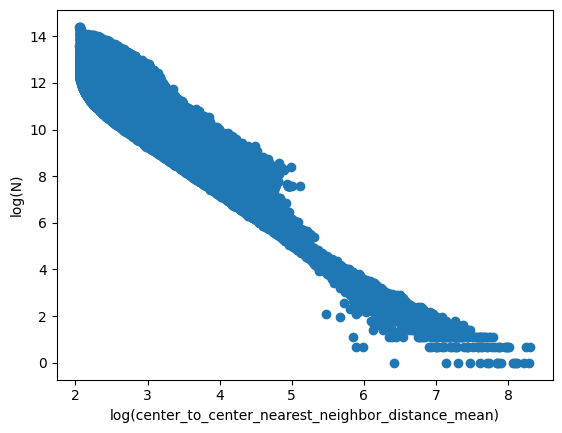

In [24]:
df = stats_df #[stats_df.information_remaining < 1].copy()
for x in ["center_to_center_nearest_neighbor_distance_mean"]:
    plt.scatter(np.log(df[x]), np.log(df.n_craters_added_in_study_region))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(N)")
    plt.show()

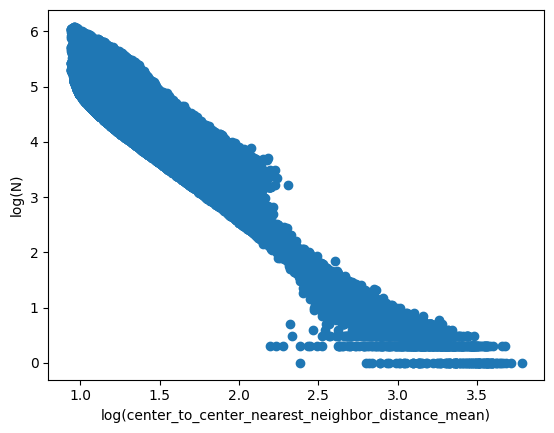

In [228]:
df = stats_df #[stats_df.information_remaining < 1].copy()
for x in ["center_to_center_nearest_neighbor_distance_mean"]:
    plt.scatter(np.log10(df[x]), np.log10(df.n_craters_added_in_study_region))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(N)")
    plt.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



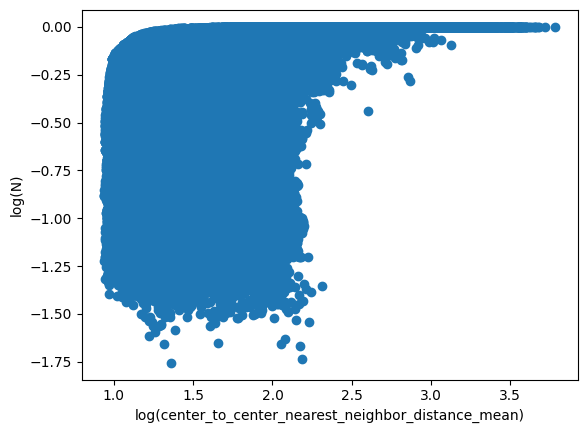

In [229]:
df = stats_df #[stats_df.information_remaining < 1].copy()
for x in ["center_to_center_nearest_neighbor_distance_mean"]:
    plt.scatter(np.log10(df[x]), np.log10(df.information_remaining))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(IR)")
    plt.show()

N appears to have greater variance after some cutoff values of most of the center-to-center and rim-to-rim distance metrics.

Examining these at these more closely with different cutoffs of IR, we find that the thin "tail" at greater values of the distance metrics shrinks. Around IR < 0.5, the tail is mostly gone.

This seems to imply that after about 50% information lost from the record, the behavior of N is different. It has larger variance, but still exhibits a relationship with some IVs.

In [25]:
distance_metrics = [
    "center_to_center_nearest_neighbor_distance_mean",
    "center_to_center_nearest_neighbor_distance_stdev",
    "center_to_center_nearest_neighbor_distance_min",
    "center_to_center_nearest_neighbor_distance_max",
]

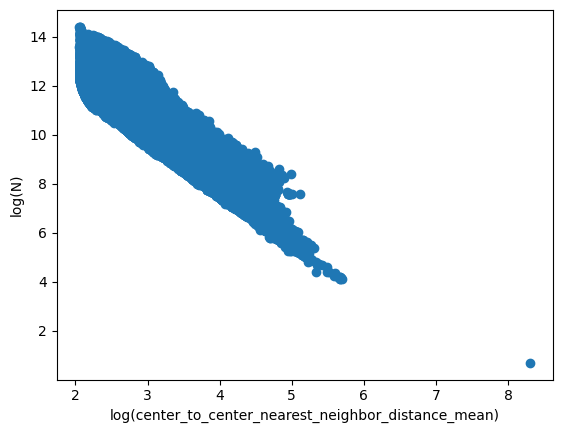

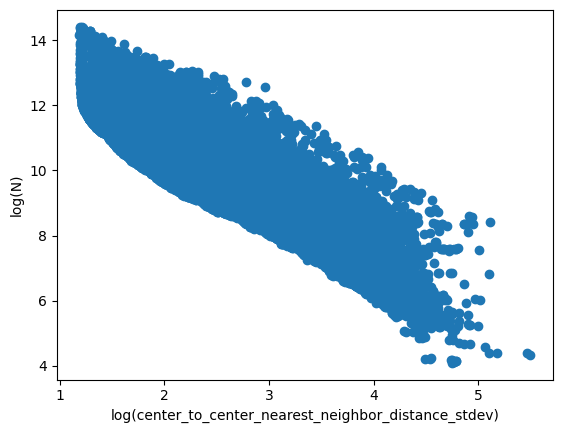

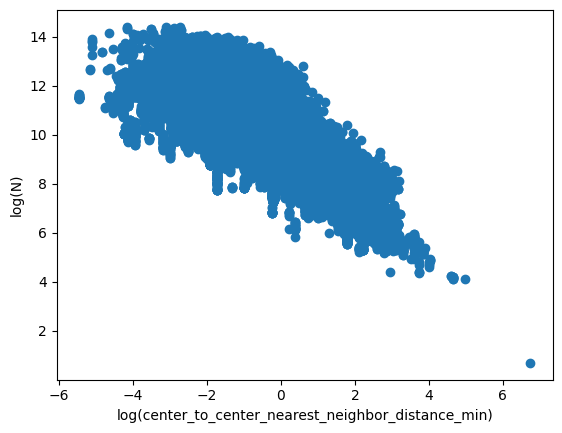

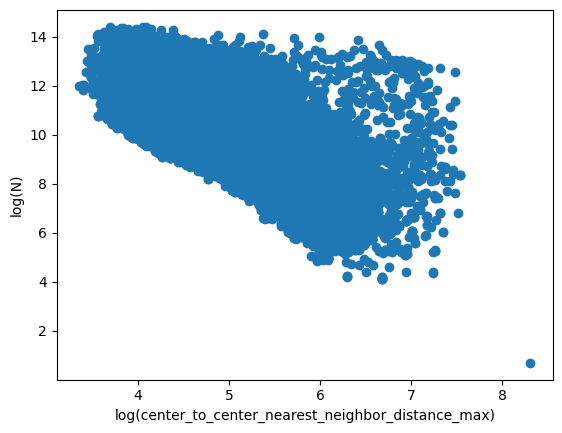

In [26]:
df = stats_df[stats_df.information_remaining < 0.8].copy()
for x in distance_metrics:
    plt.scatter(np.log(df[x]), np.log(df.n_craters_added_in_study_region))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(N)")
    plt.show()

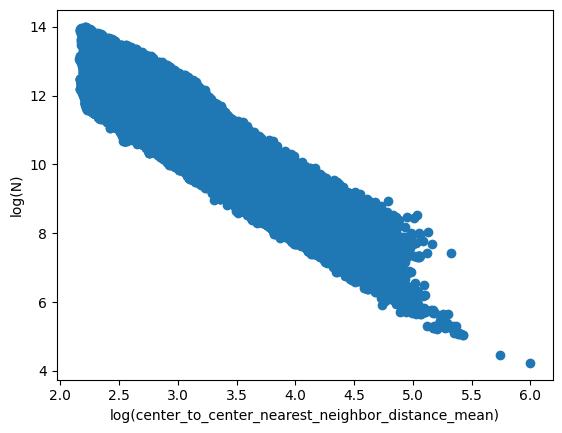

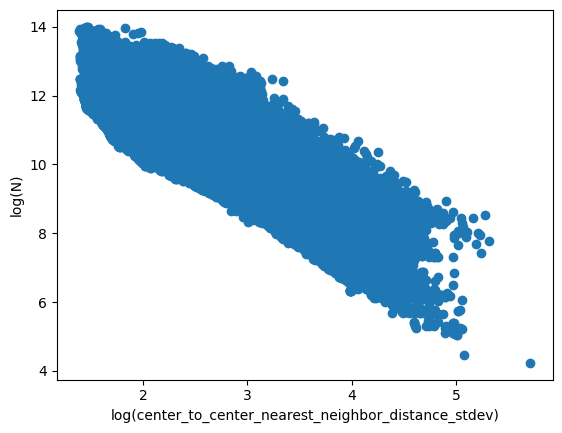

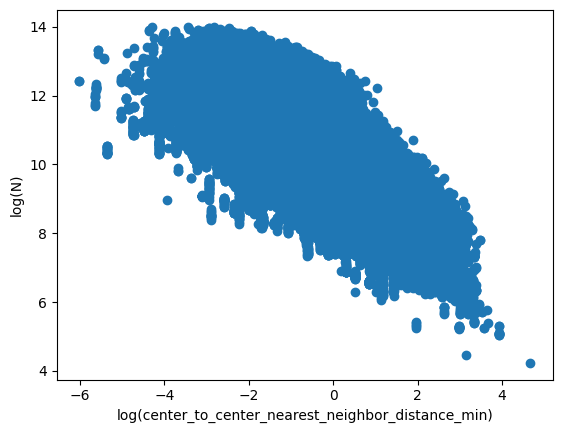

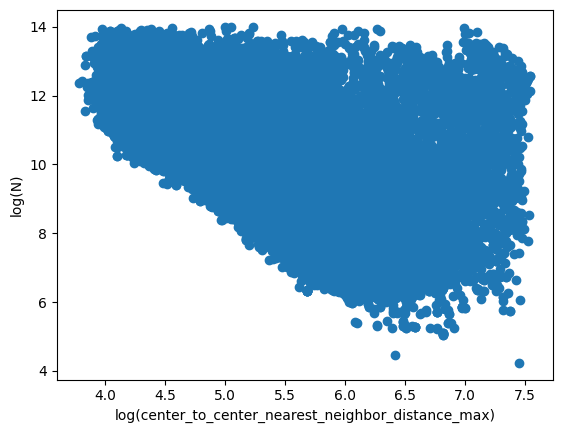

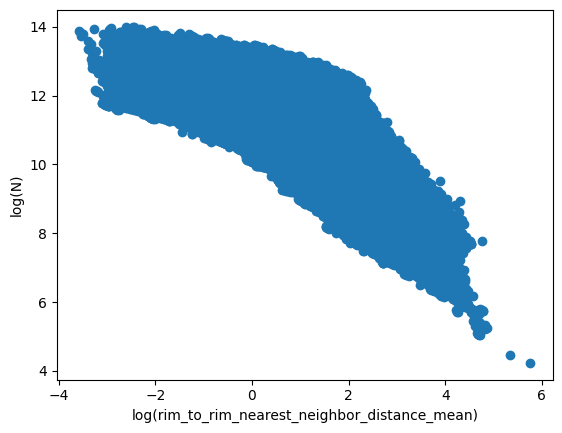

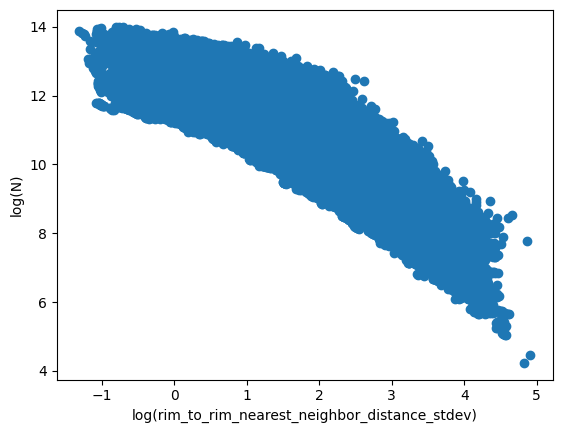

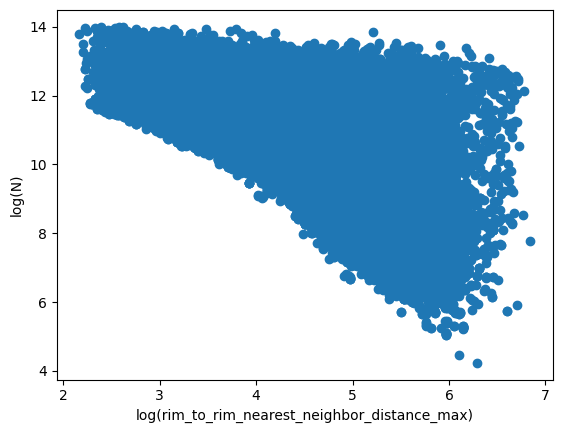

In [57]:
df = stats_df[stats_df.information_remaining < 0.5].copy()
for x in distance_metrics:
    plt.scatter(np.log(df[x]), np.log(df.n_craters_added_in_study_region))
    plt.xlabel(f"log({x})")
    plt.ylabel("log(N)")
    plt.show()

Examining correlation matrices of observations with high vs low IR.

- IR vs distance metrics correlations greatly diminishes when IR is low.
- Effective radius correlation increases in higher IR.
- Min rim percentage correlation increases in higher IR.

<Axes: >

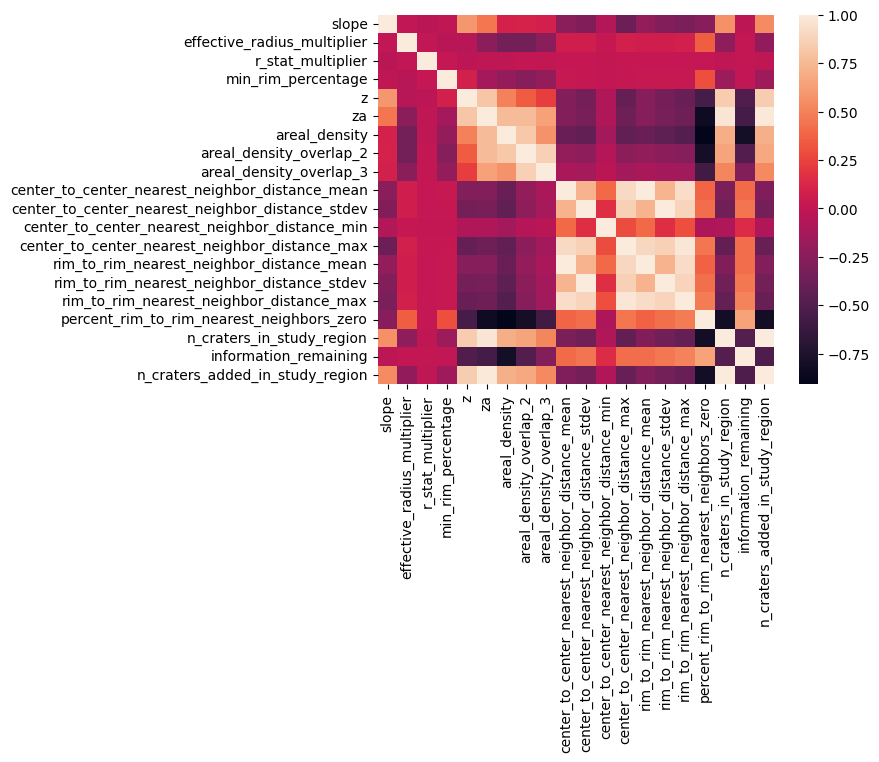

In [60]:
df = stats_df[stats_df.information_remaining > 0.7].copy()
sns.heatmap(df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr())

<Axes: >

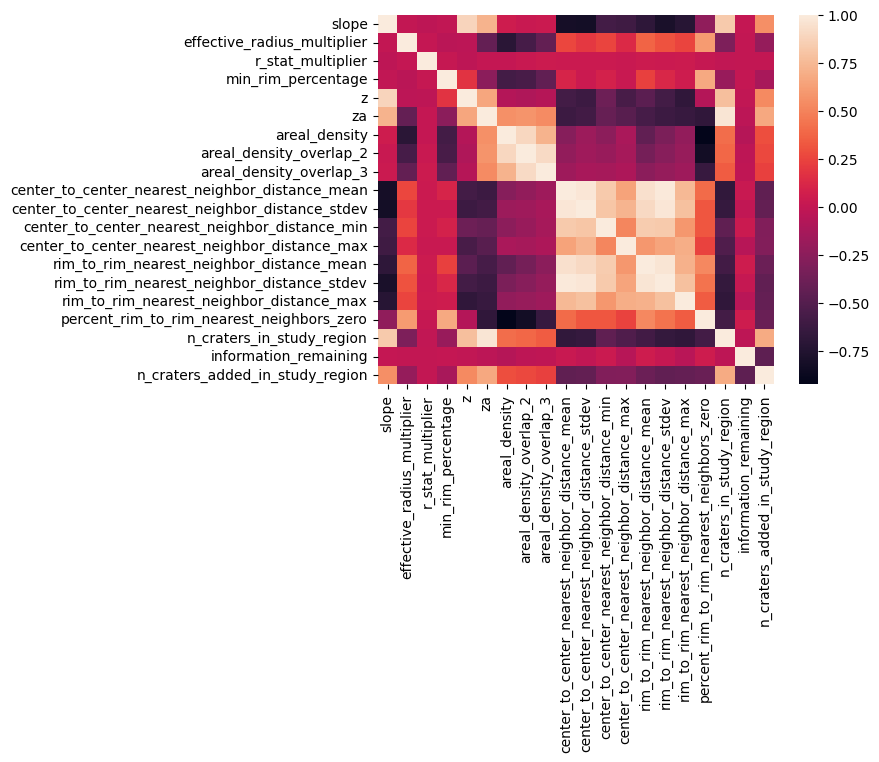

In [58]:
df = stats_df[stats_df.information_remaining < 0.5].copy()
sns.heatmap(df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr())

Correlation differences between high IR and low IR observations.

First heatmap: positive = higher correlation in high IR

Second heatmap: abs differences in correlations

Third heatmap: abs differences in correlations of log-transformed data

Notes:
- Slope has higher correlation with distance metrics in high IR
- z, za, and AD metrics have higher correlation with high IR
- Sim parameters (eff radius, r_stat, slope, min rim perc) appear to have the same correlation in high and low IR
- Log-transformed distance metrics have much higher correlation with high IR

<Axes: >

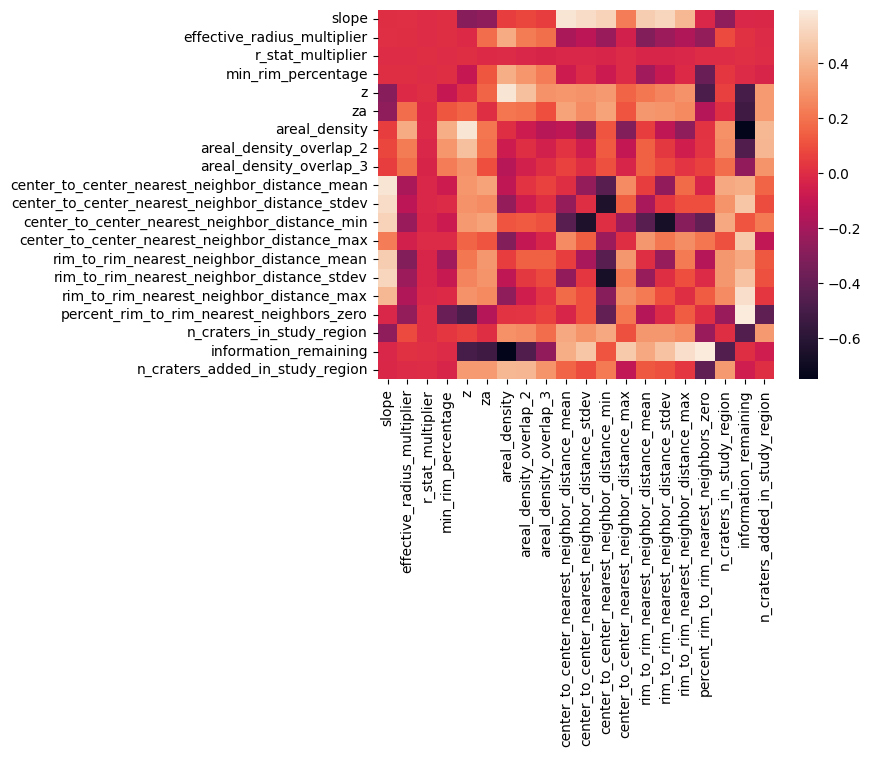

In [67]:
df = stats_df[stats_df.information_remaining > 0.7].copy()
corr1 = df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

df = stats_df[stats_df.information_remaining < 0.5].copy()
corr2 = df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

sns.heatmap(corr1 - corr2)

<Axes: >

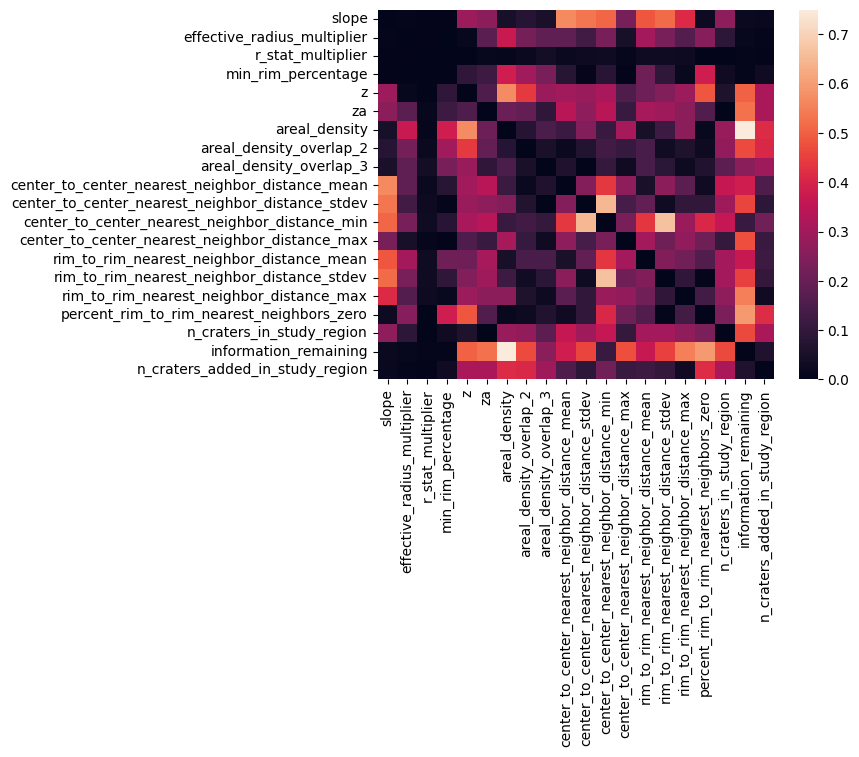

In [66]:
df = stats_df[stats_df.information_remaining > 0.7].copy()
corr1 = df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

df = stats_df[stats_df.information_remaining < 0.5].copy()
corr2 = df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

sns.heatmap(np.abs(corr1 - corr2))

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

divide by zero encountered in log

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

invalid value encountered in log

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

divide by zero encountered in log

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

invalid value encountered in log



<Axes: >

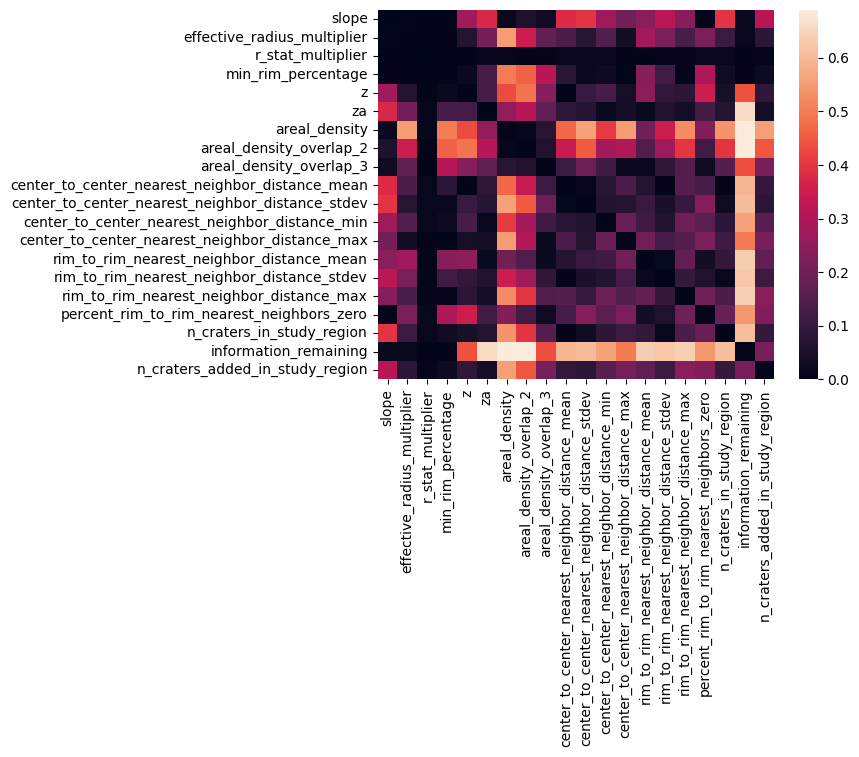

In [71]:
df = np.log(stats_df[stats_df.information_remaining > 0.7].copy())
corr1 = df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

df = np.log(stats_df[stats_df.information_remaining < 0.5].copy())
corr2 = df[ivs + ["information_remaining", "n_craters_added_in_study_region"]].corr()

sns.heatmap(np.abs(corr1 - corr2))

#### Exploratory plots of distance metrics

mean center-to-center nearest neighbor distance showed a peculiar relationship in the previous sections. Let's examine further.

In [29]:
df = stats_df #[stats_df.information_remaining < 0.5].copy()
# df = stats_df.copy()
df = df.sample(df.shape[0] // 10).copy()
df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_n_craters_added_in_study_region"] = np.log10(df.n_craters_added_in_study_region)

df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_removals"] = np.log10(1 + df.removals)
df["log_areal_density"] = np.log10(df.areal_density)
df["color"] = df.min_rim_percentage * df.effective_radius_multiplier

fig = px.scatter(
    df,
    x="log_removals",
    y="log_areal_density",
    hover_data=ivs + ["removals", "information_remaining"],
    size_max=0.25,
    color="slope"
)
fig.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



In [33]:
ir_lower = 0.4
delta = 0.01
# df = stats_df[(stats_df.information_remaining >= ir_lower) & (stats_df.information_remaining <= ir_lower + delta)].copy()
# df = stats_df[stats_df.simulation_id == 11].copy()
df = stats_df.copy()
df = df.sample(df.shape[0] // 10).copy()
df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_n_craters_added_in_study_region"] = np.log10(df.n_craters_added_in_study_region)
df["log_za"] = np.log10(df.za)

df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_removals"] = np.log10(1 + df.n_craters_added_in_study_region - df.n_craters_in_study_region)
df["removals"] = df.n_craters_added_in_study_region - df.n_craters_in_study_region
df["color"] = df.min_rim_percentage * df.effective_radius_multiplier
df["e_slope"] = np.exp(df.slope)

fig = px.scatter(
    df,
    y="log_n_craters_added_in_study_region",
    x="log_center_to_center_nearest_neighbor_distance_mean",
    hover_data=ivs + ["removals"],
    size_max=1,
    color="slope",
)
fig.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



In [77]:
ir_lower = 0.4
delta = 0.01
# df = stats_df[(stats_df.information_remaining >= ir_lower) & (stats_df.information_remaining <= ir_lower + delta)].copy()
# df = stats_df[stats_df.simulation_id == 11].copy()
df = stats_df.copy()
df = df.sample(df.shape[0] // 10).copy()
df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_n_craters_added_in_study_region"] = np.log10(df.n_craters_added_in_study_region)


df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_removals"] = np.log10(1 + df.n_craters_added_in_study_region - df.n_craters_in_study_region)
df["log_n_craters_in_study_region"] = np.log10(1 + df.n_craters_in_study_region)
df["removals"] = df.n_craters_added_in_study_region - df.n_craters_in_study_region
df["color"] = df.min_rim_percentage * df.effective_radius_multiplier

df["x_axis"] = df.effective_radius_multiplier**2 * df.min_rim_percentage
df["y_axis"] = np.sqrt(df.slope)

fig = px.scatter(
    df,
    y="y_axis",
    x="log_n_craters_in_study_region",
    hover_data=ivs + ["removals"],
    size_max=1,
    color="log_removals",
)
fig.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



In [113]:
np.corrcoef(np.log10(1 + df.center_to_center_nearest_neighbor_distance_mean), np.log10(1 + df.n_craters_in_study_region))

array([[ 1.        , -0.94983024],
       [-0.94983024,  1.        ]])

In [121]:
slope_lower = 2.25
slope_delta = 0.5
c2c_lower = 2
c2c_delta = .5

stats_df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(stats_df.center_to_center_nearest_neighbor_distance_mean)
df = stats_df.copy()
df = df.sample(df.shape[0] // 10).copy()
df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_n_craters_added_in_study_region"] = np.log10(df.n_craters_added_in_study_region)
df["log_za"] = np.log10(df.za)
df["e_slope"] = df.slope**.5 #np.exp(df.slope)

df["log_n_craters_in_study_region"] = np.log10(df.n_craters_in_study_region)
df["log_removals"] = np.log10(1 + df.n_craters_added_in_study_region - df.n_craters_in_study_region)
df["removals"] = df.n_craters_added_in_study_region - df.n_craters_in_study_region
df["color"] = df.min_rim_percentage * df.effective_radius_multiplier

df["x_axis"] = (df.slope)
df["y_axis"] = df.log_n_craters_in_study_region**.5
df["color"] = df.effective_radius_multiplier


fig = px.scatter_3d(
    df,
    y="y_axis",
    x="x_axis",
    z="log_removals",
    hover_data=ivs + ["removals"],
    size_max=1,
    color="color",
    width=1600,
    height=800
)
fig.update_traces(marker={"size":3})
fig.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log10



In [37]:
slope_lower = 2.0
slope_delta = 1
c2c_lower = 3
c2c_delta = 0.25

test_df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(test_df.center_to_center_nearest_neighbor_distance_mean)
df = test_df[(test_df.slope >= slope_lower) & (test_df.slope <= slope_lower + slope_delta) & (test_df.log_center_to_center_nearest_neighbor_distance_mean >= c2c_lower) & (test_df.log_center_to_center_nearest_neighbor_distance_mean <= c2c_lower + c2c_delta)].copy()
# df = stats_df[stats_df.simulation_id == 11].copy()
# df = stats_df.copy()
# df = df.sample(df.shape[0] // 10).copy()
df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(df.center_to_center_nearest_neighbor_distance_mean)
df["log_n_craters_added_in_study_region"] = np.log10(df.n_craters_added_in_study_region)
df["log_za"] = np.log10(df.za)

df["log_n_craters_in_study_region"] = np.log10(df.n_craters_in_study_region)
df["log_removals"] = np.log10(1 + df.n_craters_added_in_study_region - df.n_craters_in_study_region)
df["removals"] = df.n_craters_added_in_study_region - df.n_craters_in_study_region
df["color"] = df.min_rim_percentage * df.effective_radius_multiplier

fig = px.scatter_3d(
    df,
    y="log_n_craters_added_in_study_region",
    x="log_center_to_center_nearest_neighbor_distance_mean",
    z="slope",
    hover_data=ivs + ["removals"],
    size_max=1,
    color="log_n_craters_in_study_region",
    width=1600,
    height=800
)
fig.update_traces(marker={"size":4})
fig.show()

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10

/home/mason/code/saturation/venv_311/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log10



In [100]:
slope_lower = 2
slope_delta = 0.1
c2c_lower = 3
c2c_delta = 0.1

stats_df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(stats_df.center_to_center_nearest_neighbor_distance_mean)
train_df = stats_df[(stats_df.slope >= slope_lower) & (stats_df.slope <= slope_lower + slope_delta) & (stats_df.log_center_to_center_nearest_neighbor_distance_mean >= c2c_lower) & (stats_df.log_center_to_center_nearest_neighbor_distance_mean <= c2c_lower + c2c_delta)].copy()

test_df["log_center_to_center_nearest_neighbor_distance_mean"] = np.log10(test_df.center_to_center_nearest_neighbor_distance_mean)
td = test_df[(test_df.slope >= slope_lower) & (test_df.slope <= slope_lower + slope_delta) & (test_df.log_center_to_center_nearest_neighbor_distance_mean >= c2c_lower) & (test_df.log_center_to_center_nearest_neighbor_distance_mean <= c2c_lower + c2c_delta)].copy()

In [101]:
train_df.n_craters_added_in_study_region.mean()

5.235294117647059

In [102]:
td.n_craters_added_in_study_region.mean()

3.25

In [88]:
train_df

simulation_id  crater_id  n_craters_added_in_study_region  \
15655             938      50831                             3121   
195874           1474      51595                             3230   
195873           1474      51643                             3234   
361716           1487      52512                             3336   
305678           1664      53267                             3092   
...               ...        ...                              ...   
222860           2400    8966896                            69548   
222859           2400    9478781                            73492   
222857           2400    9548782                            74001   
360471           2400    9778027                            75791   
220721           1797   11147310                            76276   

        n_craters_in_study_region  areal_density  areal_density_overlap_2  \
15655                        2864       0.150449                 0.009158   
195874                       2839       0.106366                 0.002599   
195873                       2843       0.106404                 0.002599   
361716                       2943       0.117478                 0.002559   
305678                       2872       0.092833                 0.001937   
...                           ...            ...                      ...   
222860                       4433       0.165049                 0.003141   
222859                       4715       0.134460                 0.001539   
222857                       4608       0.139855                 0.001568   
360471                       2394       0.245673                 0.001308   
220721                       4509       0.164836                 0.004870   

        areal_density_overlap_3  \
15655              1.101875e-04   
195874             4.406250e-05   
195873             4.406250e-05   
361716             1.781250e-05   
305678             1.475000e-05   
...                         ...   
222860             3.312500e-06   
222859             0.000000e+00   
222857             6.250000e-07   
360471             6.812500e-06   
220721             4.168750e-05   

        center_to_center_nearest_neighbor_distance_mean  \
15655                                         37.793087   
195874                                        38.963268   
195873                                        38.914005   
361716                                        38.153675   
305678                                        39.200420   
...                                                 ...   
222860                                        33.166729   
222859                                        32.910816   
222857                                        33.229191   
360471                                        35.055447   
220721                                        32.208443   

        center_to_center_nearest_neighbor_distance_stdev  \
15655                                          18.597958   
195874                                         18.690287   
195873                                         18.662411   
361716                                         19.367727   
305678                                         18.756540   
...                                                  ...   
222860                                         15.811783   
222859                                         14.677116   
222857                                         15.712803   
360471                                         37.854458   
220721                                         15.904129   

        center_to_center_nearest_neighbor_distance_min  ...          z  \
15655                                         0.763038  ...   1.154251   
195874                                        1.705657  ...   3.876051   
195873                                        1.705657  ...   3.819383   
361716                                        2.872970  ...   3.622802   
305678                           

In [ ]:
mean_r_sq = (stats_df.slope + 0.01) / (stats_df.slope - 0.99) * x_min**2

In [639]:
from saturation.distributions import ProbabilityDistribution, ParetoProbabilityDistribution

size_distribution = ParetoProbabilityDistribution(cdf_slope=slope,
                                                  x_min=x_min,
                                                  x_max=10000000)

In [640]:
total = 0
count = 0
for x in range(1000000):
    total += size_distribution.pullback(np.random.rand())** 2
    count += 1

total/count

3348959.3274650187

65973.05703995957

In [349]:
total = 0
for x in range(100):
    count = 0
    size_distribution = ParetoProbabilityDistribution(cdf_slope=1 + x / 100 * 2,
                                                  x_min=5,
                                                  x_max=1000)
    for x in range(100000):
        total += size_distribution.pullback(np.random.rand())
        count += 1

In [350]:
total / count / 100

11.967072376025781